<a href="https://colab.research.google.com/github/Swayamprakashpatel/Plots/blob/main/All_Plot_Network_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Network Graph between Drug Smile and Protein Sequence**

In [ ]:
#@title DOWNLOAD DATA FROM KAGGLE
# DOWNLOAD DATA FROM KAGGLE (!IMPORTANT!: REFRESH RUNTIME BEFORE RE-RUNNING THE CODE)
#%%capture
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

#Make Directory of Kaggle and set its permission for access.
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

# Download Data from Kaggle Fast and Unzip them in /content
!kaggle datasets download -d drswayamprakashpatel/DTDatabase  -p /content # For model download

#Unzip data (Two Folders - Training and Validation)
import os
os.chdir('/content')
#create a directory named train/
!unzip -q DTDatabase.zip #Unzip Model

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/network.csv')

# Create an empty graph
G = nx.Graph()

# Add nodes and edges from the CSV data
for index, row in df.iterrows():
    source = row['DRUG']
    target = row['CARRIER']
    G.add_edge(source, target)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color='#800000', edge_color='gray', node_size = 50)
plt.title("Network Graph")
#plt.show()
# Set the desired resolution in DPI
dpi = 120
filename = 'Figure_2.png'
format = 'png'
# Save the plot as a .tif image with the specified resolution
plt.savefig(filename, format=format, dpi=dpi)

In [ ]:
# Get the degrees of all nodes
degrees = dict(G.degree())

# Plot a histogram of the node degrees
plt.hist(list(degrees.values()), bins=10)

# Set the plot labels
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Node Degree Distribution')

# Display the plot
plt.show()

In [ ]:
# Get the degrees of all nodes
import numpy as np
degrees = dict(G.degree())

# Calculate the coefficient of variation (degree heterogeneity)
degree_values = list(degrees.values())
coefficient_of_variation = np.std(degree_values) / np.mean(degree_values)

print(f"Coefficient of Variation: {coefficient_of_variation}")

In [ ]:
edge_betweenness = nx.edge_betweenness_centrality(G)

# Print the edge betweenness centrality for each edge
for edge, centrality in edge_betweenness.items():
    print(f"Edge: {edge}, Edge Betweenness Centrality: {centrality}")

In [ ]:
average_neighbor_degree = nx.average_neighbor_degree(G)

# Print the average neighbor degree for each node
for node, avg_degree in average_neighbor_degree.items():
    print(f"Node: {node}, Average Neighbor Degree: {avg_degree}")

In [ ]:
average_degree = sum(dict(G.degree()).values()) / len(G)

print(f"Average number of neighbors: {average_degree}")

In [ ]:
# Specify the threshold for the number of neighbors
x = 5
# Count the number of nodes with more than x neighbors
count = sum(1 for degree in dict(G.degree()).values() if degree > x)

print(f"Number of nodes with more than {x} neighbors: {count}")

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/network.csv')

# Create an empty graph
G = nx.Graph()

# Add nodes and edges from the CSV data
for index, row in df.iterrows():
    source = row['DRUG']
    target = row['CARRIER']
    G.add_edge(source, target)

# Set the threshold for the number of neighbors
x = 3  # Change this value to the desired threshold

# Get the nodes with more than x neighbors
nodes_to_highlight = [node for node, degree in G.degree() if degree > x]

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color='#800000', edge_color='darkblue', node_size=35)

# Highlight nodes with more than x neighbors
nx.draw_networkx_nodes(G, pos, nodelist=nodes_to_highlight, node_color='orange', node_size=30)

# Set the size of the edges
edge_width = 0.001  # Change this value to the desired edge size

# Draw the edges with the specified size
nx.draw_networkx_edges(G, pos, width=edge_width)

plt.title("Network Graph")

# Set the desired resolution in DPI
dpi = 120
filename = 'Figure_2.png'
format = 'png'
# Save the plot as a .png image with the specified resolution
plt.savefig(filename, format=format, dpi=dpi)


In [ ]:
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()

print(f"Total number of nodes: {total_nodes}")
print(f"Total number of edges: {total_edges}")

In [ ]:
drugs = df['DRUG'].unique()
carriers = df['CARRIER'].unique()

# Get the total number of drugs and carriers
total_drugs = len(drugs)
total_carriers = len(carriers)

print(f"Total number of drugs: {total_drugs}")
print(f"Total number of carriers: {total_carriers}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Define your ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(1766,)),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(1762, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# Generate the visualization of the model
plot_model(model, to_file='ann_model.png', show_shapes=True)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Ibuprofen-Capmul MCM C8', 'Ibuprofen-Rice Bran Oil', 'Cariprazin HCL-Capmul MCM C8',
              'Cariprazin HCL-PEG 400', 'Cariprazin HCL-Transcutol HP', 'Cariprazin HCL-Ethanol',
              'Ketoprofen-Ethanol', 'Ketoprofen-Miglyol 840', 'Ketoprofen-Oleic Acid',
              'Ketoprofen-Plurol Oleique CC 497', 'Piroxicam-Glycerol', 'Piroxicam-Isopropyl Myristate',
              'Piroxicam-Cremophor EL', 'Piroxicam-Propylene Glycol', 'Mecitentan-Ethyl Oleate',
              'Mecitentan-Triton X 100', 'Apalutamide-Peceol', 'Apalutamide-Maisine 35-1',
              'Apalutamide-Plurol Oleique CC 497', 'Apalutamide-Oleic Acid', 'Apalutamide-Glycerol',
              'Apalutamide-Isopropyl Myristate', 'Apalutamide-Ethyl Oleate', 'Apalutamide-Captext X 300',
              'Apalutamide-Propylene Glycol', 'Apalutamide-Lauroglycol 90', 'Apalutamide-Sefsol 218',
              'Apalutamide-Cremophor EL', 'Apalutamide-Tween 80', 'Apalutamide-Capmul MCM C8',
              'Apalutamide-Tween 20', 'Apalutamide-a - tocopherol', 'Apalutamide-Sea Buckthon oil',
              'Apalutamide-Transcutol HP', 'Apalutamide-PEG 400']
actual_values = [20, 26.66, 20, 13.33, 6.66, 6.66, 6.66, 20, 6.66, 6.66, 6.66, 26.66, 6.66, 6.66,
                 30, 33.33, 20, 20, 20, 75.78, 42.1, 60.45, 92.64, 10.31, 32.54, 113.4, 20, 6.66,
                 6.66, 6.66, 50, 13.33, 6.66, 6.66, 6.66]
predicted_values = [44.42, 10.05, 6.3, 8.94, 5.46, 6.98, 4.5, 6.62, 4.86, 6.72, 4.838, 7.74, 5.89,
                    8.45, 56.78, 6.85, 15.31, 8.27, 8.25, 93.75, 39.24, 74.76, 108.03, 10.89, 37.77,
                    103.86, 22.68, 6.04, 5.66, 8, 76.55, 10.37, 7.17, 7.86, 8.64]

# Generate colors for each group
colors = plt.cm.get_cmap('tab10').colors[:len(categories)]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Generate x positions for each group
x = np.arange(len(categories))

# Width of each bar
width = 0.40

# Plot the actual values
ax.bar(x - width/2, actual_values, width, label='Actual', color=colors)

# Plot the predicted values
ax.bar(x + width/2, predicted_values, width, label='Predicted', color=colors)

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)

# Set y-axis label
ax.set_ylabel('Solubility (mg/ml)')

# Show the plot
plt.tight_layout()
#plt.show()
plt.savefig('Group.png', format='png', dpi= 120)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Ibuprofen-Capmul MCM C8', 'Ibuprofen-Rice Bran Oil', 'Cariprazin HCL-Capmul MCM C8',
              'Cariprazin HCL-PEG 400', 'Cariprazin HCL-Transcutol HP', 'Cariprazin HCL-Ethanol',
              'Ketoprofen-Ethanol', 'Ketoprofen-Miglyol 840', 'Ketoprofen-Oleic Acid',
              'Ketoprofen-Plurol Oleique CC 497', 'Piroxicam-Glycerol', 'Piroxicam-Isopropyl Myristate',
              'Piroxicam-Cremophor EL', 'Piroxicam-Propylene Glycol', 'Mecitentan-Ethyl Oleate',
              'Mecitentan-Triton X 100', 'Apalutamide-Peceol', 'Apalutamide-Maisine 35-1',
              'Apalutamide-Plurol Oleique CC 497', 'Apalutamide-Oleic Acid', 'Apalutamide-Glycerol',
              'Apalutamide-Isopropyl Myristate', 'Apalutamide-Ethyl Oleate', 'Apalutamide-Captext X 300',
              'Apalutamide-Propylene Glycol', 'Apalutamide-Lauroglycol 90', 'Apalutamide-Sefsol 218',
              'Apalutamide-Cremophor EL', 'Apalutamide-Tween 80', 'Apalutamide-Capmul MCM C8',
              'Apalutamide-Tween 20', 'Apalutamide-a - tocopherol', 'Apalutamide-Sea Buckthon oil',
              'Apalutamide-Transcutol HP', 'Apalutamide-PEG 400']
actual_values = [20, 26.66, 20, 13.33, 6.66, 6.66, 6.66, 20, 6.66, 6.66, 6.66, 26.66, 6.66, 6.66,
                 30, 33.33, 20, 20, 20, 75.78, 42.1, 60.45, 92.64, 10.31, 32.54, 113.4, 20, 6.66,
                 6.66, 6.66, 50, 13.33, 6.66, 6.66, 6.66]
predicted_values = [44.42, 10.05, 6.3, 8.94, 5.46, 6.98, 4.5, 6.62, 4.86, 6.72, 4.838, 7.74, 5.89,
                    8.45, 56.78, 6.85, 15.31, 8.27, 8.25, 93.75, 39.24, 74.76, 108.03, 10.89, 37.77,
                    103.86, 22.68, 6.04, 5.66, 8, 76.55, 10.37, 7.17, 7.86, 8.64]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Generate x positions for each group
x = np.arange(len(categories))

# Width of each bar
width = 0.35

# Define patterns for each group
patterns = ['-', '+', 'x', '\\', '*', 'o', 'O', '.', '|', '/']

# Plot the actual values
ax.bar(x - width/2, actual_values, width, label='Actual', color='tab:blue', edgecolor='black', hatch=patterns[0])

# Plot the predicted values
ax.bar(x + width/2, predicted_values, width, label='Predicted', color='tab:orange', edgecolor='black', hatch=patterns[1])

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)

# Set y-axis label
ax.set_ylabel('Solubility in mg/ml')

# Set chart title
ax.set_title('Actual vs Predicted Solubility for Drug-Solvent')

# Show the plot
plt.tight_layout()
plt.savefig('Group1.tif', format='tif', dpi= 600)

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the CSV file
#uploaded = files.upload()

# Assuming the CSV file is named 'dataset.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv('Data.csv')
df = df.iloc[:,10:13]

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Create a pairplot using seaborn
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Function to plot and save the scatter plot with regression line
def plot_and_save(x_feature, y_feature):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df[x_feature], y=df[y_feature], scatter_kws={'s':50}, line_kws={'color':'red'})
    plt.title(f'{x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    # Clean file name to avoid invalid characters
    clean_x_feature = x_feature.replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'Percent').replace('/', '_')
    clean_y_feature = y_feature.replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'Percent').replace('/', '_')
    file_name = f'{clean_x_feature}_vs_{clean_y_feature}.tiff'
    plt.savefig(file_name, format='tiff', dpi=600)
    plt.show()
    files.download(file_name)

# Plot and save the specified scatter plots with regression lines
plot_and_save('Hardness(kg/cm2)', '% Friability')
plot_and_save('Hardness(kg/cm2)', 'Disin. Time')
plot_and_save('% Friability', 'Disin. Time')


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Define input and output features
input_features = ['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)']
output_features = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']

# Convert categorical variables to numerical for plotting
df_encoded = df.copy()
df_encoded['Binder Type'] = pd.factorize(df['Binder Type'])[0]
df_encoded['Disintegration Type'] = pd.factorize(df['Disintegration Type'])[0]

# Create a pairplot of input vs output features
plot = sns.pairplot(df_encoded[input_features + output_features], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s': 10}})

# Save the pairplot as a .tiff file with 600 DPI
file_name = 'scatter_plot_matrix.tiff'
plot.savefig(file_name, format='tiff', dpi=600)
files.download(file_name)


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Define input and output features
input_features = ['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)']
output_features = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']

# Convert categorical variables to numerical for plotting
df_encoded = df.copy()
df_encoded['Binder Type'] = pd.factorize(df['Binder Type'])[0]
df_encoded['Disintegration Type'] = pd.factorize(df['Disintegration Type'])[0]

# Set up the matplotlib figure
num_inputs = len(input_features)
num_outputs = len(output_features)
fig, axes = plt.subplots(num_inputs, num_outputs, figsize=(num_outputs*5, num_inputs*5))

# Plot scatter plots with regression lines
for i, input_feature in enumerate(input_features):
    for j, output_feature in enumerate(output_features):
        sns.regplot(x=df_encoded[input_feature], y=df_encoded[output_feature], ax=axes[i, j], scatter_kws={'s': 10}, line_kws={'color':'red'})
        axes[i, j].set_xlabel(input_feature)
        axes[i, j].set_ylabel(output_feature)
        axes[i, j].set_title(f'{input_feature} vs {output_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots.tiff'
fig.savefig(file_name, format='tiff', dpi=600)
files.download(file_name)


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Define input and output features
input_features = ['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)']
output_features = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']

# Convert categorical variables to numerical for plotting
df_encoded = df.copy()
df_encoded['Binder Type'] = pd.factorize(df['Binder Type'])[0]
df_encoded['Disintegration Type'] = pd.factorize(df['Disintegration Type'])[0]

# Set up the matplotlib figure
num_inputs = len(input_features)
num_outputs = len(output_features)
fig, axes = plt.subplots(num_inputs, num_outputs, figsize=(num_outputs*5, num_inputs*5))

# Plot scatter plots with regression lines
for i, input_feature in enumerate(input_features):
    for j, output_feature in enumerate(output_features):
        sns.regplot(x=df_encoded[input_feature], y=df_encoded[output_feature], ax=axes[i, j], scatter_kws={'s': 10}, line_kws={'color':'red'})
        axes[i, j].set_xlabel(input_feature)
        axes[i, j].set_ylabel(output_feature)
        axes[i, j].set_title(f'{input_feature} vs {output_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots.tiff'
fig.savefig(file_name, format='png', dpi=300)
files.download(file_name)


In [ ]:
fig.savefig(file_name, format='png', dpi=300)
files.download(file_name)

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Define input and output features
input_features = ['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)']
output_features = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']

# Convert categorical variables to numerical for plotting
df_encoded = df.copy()
df_encoded['Binder Type'] = pd.factorize(df['Binder Type'])[0]
df_encoded['Disintegration Type'] = pd.factorize(df['Disintegration Type'])[0]

# Set up the matplotlib figure
num_inputs = len(input_features)
num_outputs = len(output_features)
fig, axes = plt.subplots(num_inputs, num_outputs, figsize=(num_outputs*5, num_inputs*5))

# Plot scatter plots with regression lines and color by X-axis range
for i, input_feature in enumerate(input_features):
    for j, output_feature in enumerate(output_features):
        x = df_encoded[input_feature]
        y = df_encoded[output_feature]

        # Create a color map based on the range of the X-axis values
        norm = plt.Normalize(x.min(), x.max())
        colors = plt.cm.viridis(norm(x))

        axes[i, j].scatter(x, y, c=colors, s=10, cmap='viridis')
        sns.regplot(x=x, y=y, ax=axes[i, j], scatter=False, line_kws={'color':'red'})
        axes[i, j].set_xlabel(input_feature)
        axes[i, j].set_ylabel(output_feature)
        axes[i, j].set_title(f'{input_feature} vs {output_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots.tiff'
fig.savefig(file_name, format='tiff', dpi=300)
files.download(file_name)


In [ ]:
file_name = 'input_vs_output_scatter_plots.png'
fig.savefig(file_name, format='png', dpi=150)
files.download(file_name)

In [ ]:
feature_pairs = [
    ('Hardness(kg/cm2)', '% Friability'),
    ('Hardness(kg/cm2)', 'Disin. Time'),
    ('% Friability', 'Disin. Time')
]

# Convert categorical variables to numerical for plotting if necessary
df_encoded = df.copy()

# Set up the matplotlib figure
num_pairs = len(feature_pairs)
fig, axes = plt.subplots(1, num_pairs, figsize=(num_pairs*5, 5))

# Plot scatter plots with regression lines and color by X-axis range
for idx, (x_feature, y_feature) in enumerate(feature_pairs):
    x = df_encoded[x_feature]
    y = df_encoded[y_feature]

    # Create a color map based on the range of the X-axis values
    norm = plt.Normalize(x.min(), x.max())
    colors = plt.cm.viridis(norm(x))

    axes[idx].scatter(x, y, c=colors, s=10, cmap='viridis')
    sns.regplot(x=x, y=y, ax=axes[idx], scatter=False, line_kws={'color':'red'})
    axes[idx].set_xlabel(x_feature)
    axes[idx].set_ylabel(y_feature)
    axes[idx].set_title(f'{x_feature} vs {y_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'pair_plots.tiff'
fig.savefig(file_name, format='tiff', dpi=300)
files.download(file_name)

In [ ]:
file_name = 'CQA_Pair_Plot.png'
fig.savefig(file_name, format='png', dpi=150)
files.download(file_name)

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Define input and output features
input_features = ['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)']
output_features = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']

# Convert categorical variables to numerical for plotting
df_encoded = df.copy()
df_encoded['Binder Type'] = pd.factorize(df['Binder Type'])[0]
df_encoded['Disintegration Type'] = pd.factorize(df['Disintegration Type'])[0]

# Set up the matplotlib figure
num_inputs = len(input_features)
num_outputs = len(output_features)
fig, axes = plt.subplots(num_inputs, num_outputs, figsize=(num_outputs*5, num_inputs*5))

# Plot scatter plots and add correlation information
for i, input_feature in enumerate(input_features):
    for j, output_feature in enumerate(output_features):
        x = df_encoded[input_feature]
        y = df_encoded[output_feature]

        # Calculate Pearson correlation coefficient and p-value
        corr_coef, p_value = pearsonr(x, y)

        # Create a color map based on the range of the X-axis values
        norm = plt.Normalize(x.min(), x.max())
        colors = plt.cm.viridis(norm(x))

        axes[i, j].scatter(x, y, c=colors, s=10, cmap='viridis')
        axes[i, j].text(0.05, 0.95, f'Corr: {corr_coef:.2f}\nP-value: {p_value:.2f}', transform=axes[i, j].transAxes,
                        verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        axes[i, j].set_xlabel(input_feature)
        axes[i, j].set_ylabel(output_feature)
        axes[i, j].set_title(f'{input_feature} vs {output_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots_with_stats.tiff'
fig.savefig(file_name, format='tiff', dpi=300)
files.download(file_name)


In [ ]:
# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots_with_stats.png'
fig.savefig(file_name, format='png', dpi=100)
files.download(file_name)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Define feature pairs
feature_pairs = [
    ('Hardness(kg/cm2)', '% Friability'),
    ('Hardness(kg/cm2)', 'Disin. Time'),
    ('% Friability', 'Disin. Time')
]

# Convert categorical variables to numerical for plotting if necessary
df_encoded = df.copy()

# Set up the matplotlib figure
num_pairs = len(feature_pairs)
fig, axes = plt.subplots(1, num_pairs, figsize=(num_pairs*5, 5))

# Plot scatter plots and add correlation information
for idx, (x_feature, y_feature) in enumerate(feature_pairs):
    x = df_encoded[x_feature]
    y = df_encoded[y_feature]

    # Calculate Pearson correlation coefficient and p-value
    corr_coef, p_value = pearsonr(x, y)

    # Create a color map based on the range of the X-axis values
    norm = plt.Normalize(x.min(), x.max())
    colors = plt.cm.viridis(norm(x))

    axes[idx].scatter(x, y, c=colors, s=10, cmap='viridis')
    sns.regplot(x=x, y=y, ax=axes[idx], scatter=False, line_kws={'color':'red'})
    axes[idx].text(0.05, 0.95, f'Corr: {corr_coef:.2f}\nP-value: {p_value:.2f}', transform=axes[idx].transAxes,
                   verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    axes[idx].set_xlabel(x_feature)
    axes[idx].set_ylabel(y_feature)
    axes[idx].set_title(f'{x_feature} vs {y_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'pair_plots_with_stats.tiff'
fig.savefig(file_name, format='tiff', dpi=300)
files.download(file_name)


In [ ]:
file_name = 'pair_plots_with_stats.png'
fig.savefig(file_name, format='png', dpi=100)
files.download(file_name)

In [ ]:
# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots_with_stats.tiff'
fig.savefig(file_name, format='tiff', dpi=300)
files.download(file_name)

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Define input and output features
input_features = ['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)']
output_features = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']

# Convert categorical variables to numerical for plotting
df_encoded = df.copy()
df_encoded['Binder Type'] = pd.factorize(df['Binder Type'])[0]
df_encoded['Disintegration Type'] = pd.factorize(df['Disintegration Type'])[0]

# Set up the matplotlib figure
num_inputs = len(input_features)
num_outputs = len(output_features)
fig, axes = plt.subplots(num_inputs, num_outputs, figsize=(num_outputs*5, num_inputs*5))

# Plot scatter plots with regression lines and add correlation information
for i, input_feature in enumerate(input_features):
    for j, output_feature in enumerate(output_features):
        x = df_encoded[input_feature]
        y = df_encoded[output_feature]

        # Calculate Pearson correlation coefficient and p-value
        corr_coef, p_value = pearsonr(x, y)

        # Create a color map based on the range of the X-axis values
        norm = plt.Normalize(x.min(), x.max())
        colors = plt.cm.viridis(norm(x))

        # Plot scatter plot with colored dots and regression line
        sns.regplot(x=x, y=y, ax=axes[i, j], scatter_kws={'s': 10, 'c': colors, 'cmap': 'viridis'}, line_kws={'color': 'red'}, scatter=True, fit_reg=False)

        # Annotate with correlation coefficient and p-value
        axes[i, j].text(0.05, 0.95, f'Corr: {corr_coef:.2f}\nP-value: {p_value:.2f}', transform=axes[i, j].transAxes,
                        verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})

        axes[i, j].set_xlabel(input_feature)
        axes[i, j].set_ylabel(output_feature)
        axes[i, j].set_title(f'{input_feature} vs {output_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots_with_stats_and_dots.tiff'
fig.savefig(file_name, format='tiff', dpi=300)
files.download(file_name)


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Define input and output features
input_features = ['Binder Type', 'Disintegration Type', 'Disintegrant Amount(%)', 'Binder Amount(%)', 'A_M', 'A_MCC', 'Punch Size(mm)', 'Compressional Force(kN)', 'Tablet Weight(mg)']
output_features = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']

# Convert categorical variables to numerical for plotting
df_encoded = df.copy()
df_encoded['Binder Type'] = pd.factorize(df['Binder Type'])[0]
df_encoded['Disintegration Type'] = pd.factorize(df['Disintegration Type'])[0]

# Set up the matplotlib figure
num_inputs = len(input_features)
num_outputs = len(output_features)
fig, axes = plt.subplots(num_inputs, num_outputs, figsize=(num_outputs*5, num_inputs*5))

# Plot scatter plots with regression lines and color by X-axis range
for i, input_feature in enumerate(input_features):
    for j, output_feature in enumerate(output_features):
        x = df_encoded[input_feature]
        y = df_encoded[output_feature]

        # Calculate correlation coefficient and p-value
        corr_coef, p_value = stats.pearsonr(x, y)

        # Create a color map based on the range of the X-axis values
        norm = plt.Normalize(x.min(), x.max())
        colors = plt.cm.viridis(norm(x))

        # Scatter plot with regression line
        axes[i, j].scatter(x, y, c=colors, s=10, cmap='viridis')
        sns.regplot(x=x, y=y, ax=axes[i, j], scatter=False, line_kws={'color':'red'})

        # Annotate correlation coefficient and p-value
        axes[i, j].annotate(f'Corr: {corr_coef:.2f}\nP-value: {p_value:.4f}',
                            xy=(0.05, 0.85), xycoords='axes fraction',
                            fontsize=10, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

        axes[i, j].set_xlabel(input_feature)
        axes[i, j].set_ylabel(output_feature)
        axes[i, j].set_title(f'{input_feature} vs {output_feature}')

# Adjust layout
plt.tight_layout()

# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots_with_stats.tiff'
fig.savefig(file_name, format='tiff', dpi=300)
files.download(file_name)


In [ ]:
# Save the figure as a .tiff file with 600 DPI
file_name = 'input_vs_output_scatter_plots_with_stats.png'
fig.savefig(file_name, format='png', dpi=100)
files.download(file_name)


In [ ]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from scipy.interpolate import griddata

# Load and preprocess the dataset
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Extract the input features and output targets
X = df.iloc[:, 0:9]
X1 = X.iloc[:, 0:2]  # Binder Type and Disintegration Type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and Binder Amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitol and MCC Amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
X6 = X.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Hardness
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Disintegration Time

# One-hot encoding for categorical features
onehot_encoder = OneHotEncoder(sparse_output=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2, X3, X4, X5, X6], axis=1)

# Define the input columns and their names
input_columns = X_encoded.columns
input_names = ['Disintegrant Amount', 'Binder Amount', 'Mannitol Amount', 'MCC Amount', 'Punch Size', 'Compression Force', 'Tablet Weight']

# Define the output columns and their names
output_columns = [y1, y2, y3]
output_names = ['Hardness', 'Friability', 'Disintegration Time']

# Generate synthetic data within the min-max range for each input feature
def generate_synthetic_data(df, num_samples=100):
    synthetic_data = pd.DataFrame()
    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()
        synthetic_data[column] = np.random.uniform(min_val, max_val, num_samples)
    return synthetic_data

synthetic_inputs = generate_synthetic_data(X_encoded, num_samples=100)

# Define custom R-squared metric and loss function
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Load the trained ANN models
ann_y1 = tf.keras.models.load_model('/content/y1.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y2 = tf.keras.models.load_model('/content/y2.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y3 = tf.keras.models.load_model('/content/y3.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict the output values for the synthetic data
synthetic_outputs_y1 = ann_y1.predict(synthetic_inputs)
synthetic_outputs_y2 = ann_y2.predict(synthetic_inputs)
synthetic_outputs_y3 = ann_y3.predict(synthetic_inputs)

# Check the shape of synthetic outputs
print(f'synthetic_outputs_y1.shape: {synthetic_outputs_y1.shape}')
print(f'synthetic_outputs_y2.shape: {synthetic_outputs_y2.shape}')
print(f'synthetic_outputs_y3.shape: {synthetic_outputs_y3.shape}')

# Function to plot 3D surface
def plot_3d_surface(X, Y, Z, x_label, y_label, z_label, ax):
    xi = np.linspace(X.min(), X.max(), 100)
    yi = np.linspace(Y.min(), Y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((X, Y), Z, (xi, yi), method='cubic')

    surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    return surf

# Determine the number of rows and columns for subplots
num_inputs = len(input_columns)
num_outputs = len(output_names)
num_cols = num_inputs
num_rows = (num_inputs * num_outputs + num_cols - 1) // num_cols

# Create a figure for all subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows), subplot_kw={'projection': '3d'})

# Plot for each pair of input and output
plot_num = 0
for i in range(num_inputs):
    for j in range(i+1, num_inputs):
        for k, output_name in enumerate(output_names):
            ax = axes.flat[plot_num]
            X = synthetic_inputs.iloc[:, i]  # Feature of the first synthetic input column
            Y = synthetic_inputs.iloc[:, j]  # Feature of the second synthetic input column
            if k == 0:
                Z = synthetic_outputs_y1[:, 0]
            elif k == 1:
                Z = synthetic_outputs_y2[:, 0]
            else:
                Z = synthetic_outputs_y3[:, 0]

            plot_3d_surface(X, Y, Z, input_names[i], input_names[j], output_name, ax)
            plot_num += 1

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy.optimize import minimize
from sklearn.preprocessing import OneHotEncoder

# Load the trained ANN models
ann_y1 = tf.keras.models.load_model('/content/y1.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y2 = tf.keras.models.load_model('/content/y2.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})
ann_y3 = tf.keras.models.load_model('/content/y3.hdf5', custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Load the dataset
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.'], axis=1)

# Extract the input features and output targets
X = df.iloc[:, 0:9]
X1 = X.iloc[:, 0:2]  # Binder Type and Disintegrant Type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10  # Disintegrant and Binder Amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100  # Mannitol and MCC Amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20  # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10  # Compression Force
X6 = X.iloc[:, 8:9].apply(pd.to_numeric, errors='coerce') / 1000  # Tablet Weight

# Normalize the output targets for training
y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness (kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disintegration Time (seconds)

# One-hot encoding for categorical features
onehot_encoder = OneHotEncoder(sparse=False)
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2, X3, X4, X5, X6], axis=1)

# Define the bounds for the input features based on your dataset
bounds = [
    (X_encoded[column].min(), X_encoded[column].max()) for column in X_encoded.columns
]

# Separate bounds for categorical and continuous variables
categorical_bounds = bounds[:len(X1_encoded_df.columns)]
continuous_bounds = bounds[len(X1_encoded_df.columns):]

# Define the objective function to minimize
def objective_function(continuous_inputs):
    # Combine categorical and continuous inputs
    inputs = np.hstack((categorical_inputs, continuous_inputs))
    inputs = inputs.reshape(1, -1)

    hardness = ann_y1.predict(inputs)
    friability = ann_y2.predict(inputs)
    disintegration_time = ann_y3.predict(inputs)

    # Objective function: maximize hardness, minimize friability and disintegration time
    objective_value = friability + disintegration_time - hardness  # Adjust weights as necessary
    return objective_value[0]

# Optimize for each valid combination of categorical variables
optimal_results = []

# Generate all possible valid one-hot encoded vectors for the first two categorical inputs
categories_X1 = [list(range(len(unique_values))) for unique_values in X1.apply(pd.Series.unique)]
total_categories = [len(unique_values) for unique_values in X1.apply(pd.Series.unique)]

# Iterate through all combinations
for combination in np.array(np.meshgrid(*categories_X1)).T.reshape(-1, len(categories_X1)):
    categorical_inputs = np.zeros(sum(total_categories))
    start_idx = 0

    for i, category in enumerate(combination):
        categorical_inputs[start_idx + category] = 1
        start_idx += total_categories[i]

    # Initial guess for the continuous variables (mean of the dataset)
    initial_guess = np.mean(X_encoded.iloc[:, len(X1_encoded_df.columns):], axis=0)

    # Perform the optimization for the continuous variables
    result = minimize(objective_function, initial_guess, bounds=continuous_bounds, method='L-BFGS-B')

    # Combine the results with the categorical inputs
    optimal_inputs = np.hstack((categorical_inputs, result.x))
    optimal_results.append((optimal_inputs, result.fun))

# Find the best overall result
optimal_inputs, optimal_value = min(optimal_results, key=lambda x: x[1])

# Print the optimal inputs
print("Optimal Inputs (Standardized):", optimal_inputs)

# Split the optimal inputs back into categorical and continuous parts
optimal_categorical_inputs = optimal_inputs[:sum(total_categories)]
optimal_continuous_inputs = optimal_inputs[sum(total_categories):]

# Reverse one-hot encoding for categorical inputs
optimal_categorical_df = pd.DataFrame([optimal_categorical_inputs], columns=X1_encoded_df.columns)
optimal_categorical_values = onehot_encoder.inverse_transform(optimal_categorical_df)

# Reverse standardization for continuous inputs
optimal_disintegrant_amount = optimal_continuous_inputs[0] * 10
optimal_binder_amount = optimal_continuous_inputs[1] * 10
optimal_mannitol_amount = optimal_continuous_inputs[2] * 100
optimal_mcc_amount = optimal_continuous_inputs[3] * 100
optimal_punch_size = optimal_continuous_inputs[4] * 20
optimal_compression_force = optimal_continuous_inputs[5] * 10
optimal_tablet_weight = optimal_continuous_inputs[6] * 1000

# Print the optimal categorical and continuous inputs
print("Optimal Categorical Inputs:", optimal_categorical_values)
print("Optimal Disintegrant Amount:", optimal_disintegrant_amount)
print("Optimal Binder Amount:", optimal_binder_amount)
print("Optimal Mannitol Amount:", optimal_mannitol_amount)
print("Optimal MCC Amount:", optimal_mcc_amount)
print("Optimal Punch Size:", optimal_punch_size)
print("Optimal Compression Force:", optimal_compression_force)
print("Optimal Tablet Weight:", optimal_tablet_weight)

# Predict the corresponding outputs using the optimal inputs
optimal_inputs = optimal_inputs.reshape(1, -1)
optimal_hardness = ann_y1.predict(optimal_inputs) * 20
optimal_friability = ann_y2.predict(optimal_inputs) * 10
optimal_disintegration_time = ann_y3.predict(optimal_inputs) * 1000

print("Optimal Hardness (kg/cm2):", optimal_hardness)
print("Optimal Friability (%):", optimal_friability)
print("Optimal Disintegration Time (seconds):", optimal_disintegration_time)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import matplotlib.ticker as ticker

# Load data
data = pd.read_csv('/content/Data.csv')

# Plot histograms with normal distribution curves
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

columns = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']
for i, column in enumerate(columns):
    sns.histplot(data[column], kde=False, ax=axes[i], color='skyblue', bins=30, stat='density')

    # Fit a normal distribution and plot it
    mu, std = norm.fit(data[column])
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    axes[i].plot(x, p, 'k', linewidth=2)
    title = f'{column}\nMean: {mu:.2f}, Std: {std:.2f}'
    axes[i].set_title(title)
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2f}'))
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{y:.2f}'))

plt.tight_layout()

# Save the figure
plt.savefig('/content/histograms_with_normality_check.tiff', format='tiff', dpi=600)

# Display the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('/content/Data.csv')

# Plot cumulative frequency plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

columns = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']
for i, column in enumerate(columns):
    sorted_data = np.sort(data[column])
    cumulative_freq = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100

    axes[i].plot(sorted_data, cumulative_freq, marker='o', linestyle='-', color='b')
    axes[i].set_title(f'Cumulative Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Cumulative Frequency (%)')
    axes[i].set_ylim(0, 100)
    axes[i].grid(True)

plt.tight_layout()

# Save the figure
plt.savefig('/content/cumulative_frequency_plots.tiff', format='tiff', dpi=600)

# Display the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/Data.csv')

# Function to add marks at specific percentiles
def add_percentile_marks(ax, sorted_data, cumulative_freq, percentiles):
    for p in percentiles:
        value_at_percentile = np.percentile(sorted_data, p)
        ax.axhline(y=p, color='r', linestyle='--')
        ax.axvline(x=value_at_percentile, color='r', linestyle='--')
        ax.annotate(f'{p}%', xy=(value_at_percentile, p), xytext=(value_at_percentile + 0.5, p + 2),
                    arrowprops=dict(facecolor='black', shrink=0.05))

# Plot cumulative frequency plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

columns = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']
percentiles = [20, 50, 80, 90]

for i, column in enumerate(columns):
    sorted_data = np.sort(data[column])
    cumulative_freq = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100

    axes[i].plot(sorted_data, cumulative_freq, marker='o', linestyle='-', color='b')
    axes[i].set_title(f'Cumulative Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Cumulative Frequency (%)')
    axes[i].set_ylim(0, 100)
    axes[i].grid(True)

    # Add percentile marks
    add_percentile_marks(axes[i], sorted_data, cumulative_freq, percentiles)

plt.tight_layout()

# Save the figure
plt.savefig('/content/cumulative_frequency_plots_with_marks.tiff', format='tiff', dpi=600)

# Display the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/Data.csv')

# Function to add marks at specific percentiles
def add_percentile_marks(ax, sorted_data, cumulative_freq, percentiles):
    for p in percentiles:
        value_at_percentile = np.percentile(sorted_data, p)
        ax.axhline(y=p, color='r', linestyle='--')
        ax.axvline(x=value_at_percentile, color='r', linestyle='--')
        ax.annotate(f'{p}%', xy=(value_at_percentile, p), xytext=(value_at_percentile + 0.5, p + 2),
                    arrowprops=dict(facecolor='black', shrink=0.05))

# Plot cumulative frequency plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

columns = ['Hardness(kg/cm2)', '% Friability', 'Disin. Time']
percentiles = [20, 50, 80, 90]

for i, column in enumerate(columns):
    sorted_data = np.sort(data[column])
    cumulative_freq = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100

    axes[i].plot(sorted_data, cumulative_freq, marker='o', linestyle='-', color='b')
    axes[i].set_title(f'Cumulative Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Cumulative Frequency (%)')
    axes[i].set_ylim(0, 100)
    axes[i].grid(True)

    # Add percentile marks
    add_percentile_marks(axes[i], sorted_data, cumulative_freq, percentiles)

plt.tight_layout()

# Save the figure
plt.savefig('/content/cumulative_frequency_plots_with_marks.png', format='png', dpi=100)

# Display the plot
plt.show()

In [ ]:
from google.colab import files

files.download('/content/cumulative_frequency_plots_with_marks.tiff')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Time points
time = np.array([1, 2, 4, 6, 8, 12])

# Plasma concentrations
API = np.array([14.01, 6.12, 1.32, 0.32, np.nan, np.nan])
T1 = np.array([33.97, 28.34, 19.50, 12.35, 8.16, 2.04])
T2 = np.array([29.63, 23.47, 13.15, 7.96, 3.72, 0.30])

# Standard deviations
SD_API = np.array([2.66, 2.63, 0.59, 0.30, np.nan, np.nan])
SD_T1 = np.array([1.68, 2.95, 2.63, 3.07, 2.69, 0.27])
SD_T2 = np.array([2.40, 2.80, 2.77, 1.77, 1.92, 0.01])

# Plotting
plt.figure(figsize=(10, 6))

plt.errorbar(time, API, yerr=SD_API, fmt='-o', label='API', capsize=5)
plt.errorbar(time, T1, yerr=SD_T1, fmt='-o', label='T1', capsize=5)
plt.errorbar(time, T2, yerr=SD_T2, fmt='-o', label='T2', capsize=5)

plt.xlabel('Time (h)')
plt.ylabel('Plasma Concentration (mcg/ml)')
plt.title('Time vs Plasma Concentration')
plt.legend()
plt.grid(True)

plt.savefig('/content/pk.tiff', format='tiff', dpi=600)

# Display the plot
plt.show()

from google.colab import files

files.download('/content/pk.tiff')

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import linregress
from scipy.integrate import simps

# Define the data
time = np.array([1, 2, 4, 6, 8, 12, 24])
api = np.array([14.01, 6.12, 1.32, 0.32, np.nan, np.nan, np.nan])
t1 = np.array([33.97, 28.34, 19.50, 12.35, 8.16, 2.04, np.nan])
t2 = np.array([29.63, 23.47, 13.15, 7.96, 3.72, 0.30, np.nan])

# Linear regression to estimate the elimination rate constant (k)
def calculate_k(concentration, time):
    valid_indices = ~np.isnan(concentration)
    log_conc = np.log(concentration[valid_indices])
    slope, intercept, _, _, _ = linregress(time[valid_indices], log_conc)
    k = -slope
    return k, np.exp(intercept)

# Calculate AUC using the trapezoidal rule
def calculate_auc(concentration, time):
    valid_indices = ~np.isnan(concentration)
    auc = simps(concentration[valid_indices], time[valid_indices])
    return auc

# Calculate AUMC using the trapezoidal rule
def calculate_aumc(concentration, time):
    valid_indices = ~np.isnan(concentration)
    aumc = simps(concentration[valid_indices] * time[valid_indices], time[valid_indices])
    return aumc

# Calculate pharmacokinetic parameters
def pk_parameters(concentration, time):
    k, C0 = calculate_k(concentration, time)
    t_half = 0.693 / k
    dose = 1  # Assuming a dose of 1 unit for calculation
    Vd = dose / C0
    Cl = Vd * k
    auc = calculate_auc(concentration, time)
    aumc = calculate_aumc(concentration, time)
    mrt = aumc / auc
    return k, t_half, Vd, Cl, auc, mrt

# Calculate parameters for each formulation
api_params = pk_parameters(api, time)
t1_params = pk_parameters(t1, time)
t2_params = pk_parameters(t2, time)

# Create a comparison table
columns = ['Parameter', 'API', 'T1', 'T2']
parameters = ['Elimination rate constant (k)', 'Half-life (t1/2)', 'Volume of distribution (Vd)', 'Clearance (Cl)', 'AUC', 'MRT']
api_values = [api_params[0], api_params[1], api_params[2], api_params[3], api_params[4], api_params[5]]
t1_values = [t1_params[0], t1_params[1], t1_params[2], t1_params[3], t1_params[4], t1_params[5]]
t2_values = [t2_params[0], t2_params[1], t2_params[2], t2_params[3], t2_params[4], t2_params[5]]

data = {'Parameter': parameters, 'API': api_values, 'T1': t1_values, 'T2': t2_values}
df = pd.DataFrame(data, columns=columns)

# Display the table
print(df)

# Save the table to a CSV file
df.to_csv('pk_comparison_table.csv', index=False)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ternary

# Generate data for D = 30, 40, 50
data = []
for d_value in [30, 40, 50]:
    for a in np.linspace(0.1, 0.8, 8):
        for b in np.linspace(0.1, 0.8, 8):
            c = 1 - a - b
            if c >= 0.1:  # Ensure valid ternary coordinates
                data.append([a, b, c, d_value])

data = np.array(data)

# Plotting
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(10, 8)

# Plot the ternary scatter plot for A, B, C
tax.scatter(data[:, :3], marker='o', color='blue', label='A, B, C')

# Plot the contour lines for D
contour_values = [30, 40, 50]
tax.contour(data[:, :3], data[:, 3], contour_values=contour_values, cmap=plt.cm.get_cmap('viridis'))

# Set axis labels and title
fontsize = 14
tax.set_title("Ternary Plot with Contour Lines for D", fontsize=fontsize)
tax.left_axis_label("A", fontsize=fontsize)
tax.right_axis_label("B", fontsize=fontsize)
tax.bottom_axis_label("C", fontsize=fontsize)

# Legend and grid
tax.legend()
tax.gridlines(multiple=0.1, color="blue")

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'time': [0, 15, 30, 45, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720],
    'Reactin': [0, 5.91, 9.36, 12.77, 14.65, 26.41, 33.11, 37.90, 46.03, 58.99, 75.63, 80.01, 78.05, 78.98, 83.59, 91.79],
    'Reactin_sd': [0, 1.43, 1.75, 2.46, 3.01, 5.77, 5.00, 5.05, 6.06, 14.32, 8.23, 5.11, 3.22, 8.37, 4.51, 9.18],
    'Dan': [0, 3.81, 5.93, 8.10, 9.58, 17.89, 27.70, 32.80, 39.41, 40.46, 50.51, 55.65, 66.80, 66.69, 83.34, 89.43],
    'Dan_sd': [0, 0.36, 0.71, 0.91, 1.46, 2.33, 4.72, 3.91, 5.42, 9.35, 3.52, 6.24, 8.32, 7.25, 2.86, 3.88],
    'Nac': [0, 10.78, 23.40, 34.67, 42.62, 53.78, 60.31, 63.60, 70.14, 75.38, 95.95, 82.60, 91.54, 74.52, 84.84, 95.71],
    'Nac_sd': [0, 4.41, 8.58, 12.01, 18.81, 21.54, 19.09, 15.50, 10.13, 7.13, 12.58, 5.35, 2.86, 3.55, 9.11, 8.67],
    'Dicloran': [0, 36.48, 54.61, 67.34, 68.35, 74.91, 74.78, 79.96, 85.94, 86.93, 96.36, 97.01, 98.22, 96.46, 95.89, 99.28],
    'Dicloran_sd': [0, 2.32, 7.30, 13.28, 8.78, 8.77, 7.75, 4.64, 2.61, 4.02, 3.15, 2.87, 1.58, 6.39, 4.29, 3.97],
    'Dynapar': [0, 3.71, 6.45, 9.20, 10.89, 20.04, 27.60, 35.07, 41.54, 43.46, 70.64, 89.76, 93.04, 87.05, 86.87, 93.13],
    'Dynapar_sd': [0, 2.05, 1.29, 0.85, 1.15, 5.65, 0.35, 3.83, 4.18, 7.04, 3.56, 2.86, 3.98, 5.27, 5.92, 3.23]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))

brands = ['Reactin', 'Dan', 'Nac', 'Dicloran', 'Dynapar']
colors = ['blue', 'green', 'red', 'purple', 'orange']
markers = ['o', 's', 'D', '^', 'v']

for brand, color, marker in zip(brands, colors, markers):
    plt.errorbar(df['time']/60, df[brand], yerr=df[f'{brand}_sd'], fmt=marker, color=color, label=brand)

plt.xlabel('Time (Hours)')
plt.ylabel('% Cumulative Drug Release')
plt.title('% Cumulative Drug Release vs Time (Hours)')
plt.legend()
plt.grid(True)

# Save plot
plt.savefig('/content/drug_release_plot.png', dpi=600)

# Download plot
from google.colab import files
files.download('/content/drug_release_plot.png')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'time': [0, 15, 30, 45, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720],
    'Reactin': [0, 5.91, 9.36, 12.77, 14.65, 26.41, 33.11, 37.90, 46.03, 58.99, 75.63, 80.01, 78.05, 78.98, 83.59, 91.79],
    'Reactin_sd': [0, 1.43, 1.75, 2.46, 3.01, 5.77, 5.00, 5.05, 6.06, 14.32, 8.23, 5.11, 3.22, 8.37, 4.51, 9.18],
    'Dan': [0, 3.81, 5.93, 8.10, 9.58, 17.89, 27.70, 32.80, 39.41, 40.46, 50.51, 55.65, 66.80, 66.69, 83.34, 89.43],
    'Dan_sd': [0, 0.36, 0.71, 0.91, 1.46, 2.33, 4.72, 3.91, 5.42, 9.35, 3.52, 6.24, 8.32, 7.25, 2.86, 3.88],
    'Nac': [0, 10.78, 23.40, 34.67, 42.62, 53.78, 60.31, 63.60, 70.14, 75.38, 95.95, 82.60, 91.54, 74.52, 84.84, 95.71],
    'Nac_sd': [0, 4.41, 8.58, 12.01, 18.81, 21.54, 19.09, 15.50, 10.13, 7.13, 12.58, 5.35, 2.86, 3.55, 9.11, 8.67],
    'Dicloran': [0, 36.48, 54.61, 67.34, 68.35, 74.91, 74.78, 79.96, 85.94, 86.93, 96.36, 97.01, 98.22, 96.46, 95.89, 99.28],
    'Dicloran_sd': [0, 2.32, 7.30, 13.28, 8.78, 8.77, 7.75, 4.64, 2.61, 4.02, 3.15, 2.87, 1.58, 6.39, 4.29, 3.97],
    'Dynapar': [0, 3.71, 6.45, 9.20, 10.89, 20.04, 27.60, 35.07, 41.54, 43.46, 70.64, 89.76, 93.04, 87.05, 86.87, 93.13],
    'Dynapar_sd': [0, 2.05, 1.29, 0.85, 1.15, 5.65, 0.35, 3.83, 4.18, 7.04, 3.56, 2.86, 3.98, 5.27, 5.92, 3.23]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))

brands = ['Reactin', 'Dan', 'Nac', 'Dicloran', 'Dynapar']
colors = ['blue', 'green', 'red', 'purple', 'orange']
markers = ['o', 's', 'D', '^', 'v']

for brand, color, marker in zip(brands, colors, markers):
    plt.plot(df['time']/60, df[brand], marker=marker, color=color, label=brand)
    plt.errorbar(df['time']/60, df[brand], yerr=df[f'{brand}_sd'], fmt='none', ecolor=color, capsize=3)

plt.xlabel('Time (Hours)')
plt.ylabel('% Cumulative Drug Release')
plt.title('% Cumulative Drug Release vs Time (Hours)')
plt.legend()
plt.grid(True)

# Save plot
plt.savefig('/content/drug_release_plot.tiff', dpi=600, format='tiff')

# Download plot
from google.colab import files
files.download('/content/drug_release_plot.tiff')

plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Data
data = {
    'time': [0, 15, 30, 45, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720],
    'Reactin': [0, 5.91, 9.36, 12.77, 14.65, 26.41, 33.11, 37.90, 46.03, 58.99, 75.63, 80.01, 78.05, 78.98, 83.59, 91.79],
    'Dan': [0, 3.81, 5.93, 8.10, 9.58, 17.89, 27.70, 32.80, 39.41, 40.46, 50.51, 55.65, 66.80, 66.69, 83.34, 89.43],
    'Nac': [0, 10.78, 23.40, 34.67, 42.62, 53.78, 60.31, 63.60, 70.14, 75.38, 95.95, 82.60, 91.54, 74.52, 84.84, 95.71],
    'Dicloran': [0, 36.48, 54.61, 67.34, 68.35, 74.91, 74.78, 79.96, 85.94, 86.93, 96.36, 97.01, 98.22, 96.46, 95.89, 99.28],
    'Dynapar': [0, 3.71, 6.45, 9.20, 10.89, 20.04, 27.60, 35.07, 41.54, 43.46, 70.64, 89.76, 93.04, 87.05, 86.87, 93.13]
}

df = pd.DataFrame(data)

def calculate_f1_f2(reference, test):
    n = len(reference)
    f1 = (np.sum(np.abs(reference - test)) / np.sum(reference)) * 100
    f2 = 50 * np.log10((1 + (1/n) * np.sum((reference - test)**2))**-0.5 * 100)
    return f1, f2

brands = ['Reactin', 'Dan', 'Nac', 'Dicloran', 'Dynapar']
results = []

for i in range(len(brands)):
    for j in range(i + 1, len(brands)):
        f1, f2 = calculate_f1_f2(df[brands[i]], df[brands[j]])
        results.append({
            'Brand 1': brands[i],
            'Brand 2': brands[j],
            'F1': f1,
            'F2': f2
        })

f1_f2_df = pd.DataFrame(results)
print(f1_f2_df)

# Save table as CSV
f1_f2_df.to_csv('/content/f1_f2_scores.csv', index=False)

# Download CSV
from google.colab import files
files.download('/content/f1_f2_scores.csv')


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Updated data for Isoniazid and other columns
data = {
    'Isoniazid': [0.4, 0.3, 0.5],
    '6a': [0.6, 0.5, 0.7],
    '6b': [1.3, 1.4, 1.2],
    '6c': [1.5, 1.4, 1.6],
    '6d': [1.0, 0.9, 1.1],
    '6e': [1.2, 1.3, 1.1],
    '6f': [2.3, 2.2, 2.4],
    '6g': [1.2, 1.3, 1.1],
    '6h': [1.9, 1.8, 2.0],
    '6i': [2.4, 2.5, 2.3],
    '6j': [1.4, 1.3, 1.5],
    '6k': [0.9, 0.8, 1.0],
    '6l': [1.3, 1.2, 1.4],
    '6m': [1.6, 1.7, 1.5],
    '6n': [1.7, 1.6, 1.8],
    '6o': [1.4, 1.3, 1.5],
    '6p': [1.5, 1.6, 1.4],
    '6q': [1.3, 1.2, 1.4]
}

# Calculate the average and standard deviation for each column
labels = list(data.keys())
means = [np.mean(data[label]) for label in labels]
errors = [np.std(data[label]) for label in labels]

# Define distinct colors suitable for scientific publication
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f']

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(labels, means, yerr=errors, capsize=5, color=colors[:len(labels)])

# Add labels and title
ax.set_xlabel('Sample')
ax.set_ylabel(r'H$_{37}$RV (MIC) $\mu$M')
ax.set_title('Bar Chart with Average and Error Bars for Isoniazid Data')
plt.xticks(rotation=90)

# Annotate the Isoniazid bar with (p < 0.05)
isoniazid_index = labels.index('Isoniazid')
isoniazid_bar = bars[isoniazid_index]
ax.text(isoniazid_bar.get_x() + isoniazid_bar.get_width() / 2,
        isoniazid_bar.get_height() + errors[isoniazid_index] + 0.1,
        '(p < 0.05)',
        ha='center', va='bottom', fontsize=10, color='black')

# Save the plot as a .png file with 300 DPI
plt.tight_layout()
plt.savefig('isoniazid_bar_chart.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Updated data for Isoniazid and other columns
data = {
    'Isoniazid': [0.4, 0.3, 0.5],
    '6a': [0.6, 0.5, 0.7],
    '6b': [1.3, 1.4, 1.2],
    '6c': [1.5, 1.4, 1.6],
    '6d': [1.0, 0.9, 1.1],
    '6e': [1.2, 1.3, 1.1],
    '6f': [2.3, 2.2, 2.4],
    '6g': [1.2, 1.3, 1.1],
    '6h': [1.9, 1.8, 2.0],
    '6i': [2.4, 2.5, 2.3],
    '6j': [1.4, 1.3, 1.5],
    '6k': [0.9, 0.8, 1.0],
    '6l': [1.3, 1.2, 1.4],
    '6m': [1.6, 1.7, 1.5],
    '6n': [1.7, 1.6, 1.8],
    '6o': [1.4, 1.3, 1.5],
    '6p': [1.5, 1.6, 1.4],
    '6q': [1.3, 1.2, 1.4]
}

# Calculate the average and standard deviation for each column
labels = list(data.keys())
means = [np.mean(data[label]) for label in labels]
errors = [np.std(data[label]) for label in labels]

# Define distinct colors suitable for scientific publication
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f']

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(labels, means, yerr=errors, capsize=5, color=colors[:len(labels)])

# Add labels and title
ax.set_xlabel('Compound')
ax.set_ylabel(r'H$_{37}$RV (MIC) $\mu$M')
ax.set_title('MIC values of Synthesized Compounds')
plt.xticks(rotation=90)

# Add a bracket between Isoniazid and 6a
x_positions = [labels.index('Isoniazid'), labels.index('6a')]
y_min = min(means[i] - errors[i] for i in x_positions)
y_max = max(means[i] + errors[i] for i in x_positions)
plt.plot([x_positions[0], x_positions[0]], [y_min, y_max], color='black')
plt.plot([x_positions[1], x_positions[1]], [y_min, y_max], color='black')
plt.plot([x_positions[0], x_positions[1]], [y_max, y_max], color='black')
plt.text((x_positions[0] + x_positions[1]) / 2, y_max + 0.1, '(p > 0.05)',
         ha='center', va='bottom', fontsize=10, color='black')

# Save the plot as a .png file with 300 DPI
plt.tight_layout()
plt.savefig('isoniazid_bar_chart.png', dpi=600)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('/content/Actual_vs_Predicated_Calibration.csv')

# Define the columns for predicted values
models = [
    'Linear Regression', 'Linear Regression (error)', 'AdaBoost', 'AdaBoost (error)',
    'Neural Network', 'Neural Network (error)', 'SVM', 'SVM (error)',
    'Gradient Boosting', 'Gradient Boosting (error)', 'Random Forest',
    'Random Forest (error)', 'kNN', 'kNN (error)', 'PCR', 'PCR (error)', 'PLS', 'PLS (error)'
]

# Extract model predictions and actual values
model_predictions = {model: data[model] for model in models if 'error' not in model}
y_actual = data['Meloxicam']

# Initialize lists to store metrics
rmsec_values = {}
press_values = {}
rep_values = {}

# Calculate RMSEC, PRESS, and REP%
for model, y_pred in model_predictions.items():
    # Calculate residuals
    residuals = y_actual - y_pred

    # Calculate RMSEC
    rmsec = np.sqrt(np.mean(residuals**2))
    rmsec_values[model] = rmsec

    # Calculate PRESS
    press = np.sum(residuals**2)
    press_values[model] = press

    # Calculate REP%
    mean_actual = np.mean(y_actual)
    rep = 100 * np.sqrt(np.sum(residuals**2) / np.sum((y_actual - mean_actual)**2))
    rep_values[model] = rep

# Print RMSEC, PRESS, and REP% values
print("RMSEC Values:")
for model, rmsec in rmsec_values.items():
    print(f"{model}: {rmsec:.4f}")

print("\nPRESS Values:")
for model, press in press_values.items():
    print(f"{model}: {press:.4f}")

print("\nREP% Values:")
for model, rep in rep_values.items():
    print(f"{model}: {rep:.4f}%")

# Plot Actual vs Predicted values for all models
plt.figure(figsize=(14, 10))

for model in model_predictions:
    y_pred = model_predictions[model]
    plt.scatter(y_actual, y_pred, alpha=0.6, label=model)

# Add the identity line
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'k--', lw=2, label='Identity Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for All Models')
plt.legend(loc='best')
plt.grid(True)

# Save the plot as a PNG file with 300 DPI
plt.savefig('actual_vs_predicted_all_models.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV
data = pd.read_csv('/content/Actual_vs_Predicated.csv')

# Define the columns for predicted values
models = [
    'Linear Regression', 'Linear Regression (error)', 'AdaBoost', 'AdaBoost (error)',
    'Neural Network', 'Neural Network (error)', 'SVM', 'SVM (error)',
    'Gradient Boosting', 'Gradient Boosting (error)', 'Random Forest',
    'Random Forest (error)', 'kNN', 'kNN (error)', 'PCR', 'PCR (error)', 'PLS', 'PLS (error)'
]

# Extract model predictions and actual values
model_predictions = {model: data[model] for model in models if 'error' not in model}
y_actual = data['Bupivacan']

# Initialize lists to store metrics
rmsec_values = {}
press_values = {}
rep_values = {}

# Calculate RMSEC, PRESS, and REP%
for model, y_pred in model_predictions.items():
    # Calculate residuals
    residuals = y_actual - y_pred

    # Calculate RMSEC
    rmsec = np.sqrt(np.mean(residuals**2))
    rmsec_values[model] = rmsec

    # Calculate PRESS
    press = np.sum(residuals**2)
    press_values[model] = press

    # Calculate REP%
    mean_actual = np.mean(y_actual)
    rep = 100 * np.sqrt(np.sum(residuals**2) / np.sum((y_actual - mean_actual)**2))
    rep_values[model] = rep

# Create DataFrames for tabulated results
rmsec_df = pd.DataFrame(list(rmsec_values.items()), columns=['Model', 'RMSEC'])
press_df = pd.DataFrame(list(press_values.items()), columns=['Model', 'PRESS'])
rep_df = pd.DataFrame(list(rep_values.items()), columns=['Model', 'REP%'])

# Print tables
print("RMSEC Values:")
print(rmsec_df.to_string(index=False))

print("\nPRESS Values:")
print(press_df.to_string(index=False))

print("\nREP% Values:")
print(rep_df.to_string(index=False))

# Plot Actual vs Predicted values for all models
plt.figure(figsize=(14, 10))

for model in model_predictions:
    y_pred = model_predictions[model]
    plt.scatter(y_actual, y_pred, alpha=0.6, label=model)

# Add the identity line
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'k--', lw=2, label='Identity Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for All Models')
plt.legend(loc='best')
plt.grid(True)

# Save the plot as a PNG file with 300 DPI
plt.savefig('actual_vs_predicted_all_models.png', dpi=300, format='png')

# Show the plot
plt.show()


In [ ]:
plt.savefig('actual_vs_predicted_all_models.png', dpi=300, format='png')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV file
file_path = '/content/DSC.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract data for Paracetamol
temp_paracetamol = data.iloc[:, 0].dropna()
mw_paracetamol = data.iloc[:, 1].dropna()

# Extract data for Vanillin
temp_vanillin = data.iloc[:, 2].dropna()
mw_vanillin = data.iloc[:, 3].dropna()

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Paracetamol with reduced line thickness
plt.plot(temp_paracetamol, mw_paracetamol, label='Paracetamol', color='blue', linewidth= 0.5)

# Plot Vanillin with reduced line thickness
plt.plot(temp_vanillin, mw_vanillin, label='Vanillin', color='red', linewidth=0.5)

# Set the x-axis limits to cover the range 25°C to 350°C
plt.xlim(25, 250)

# Adding labels and title
plt.xlabel('Temperature [°C]')
plt.ylabel('Heat Flow [mW]')
plt.title('DSC Analysis of Paracetamol and Vanillin')

# Adding legend inside the plot
plt.legend(loc='upper right')

# Save plot as .tiff with 300 dpi
plt.savefig('dsc_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the FTIR data from CSV file
file_path = '/content/FTIR_Diclofenac.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract Wavelength and %T columns
wavelength = data['Wavelength']
pcm_f = data['%T']
#pcm_o = data['%T_PCM_O']
#vanilline_f = data['%T_Vanilline_F']
#vanilline_o = data['%T_Vanilline_O']
#mix_f = data['%T_Mix_F']
#mix_o = data['%T_Mix_O']

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each %T data with a different color and label
plt.plot(wavelength, pcm_f, label='%T', color='blue')
#plt.plot(wavelength, pcm_o, label='%T_PCM_O', color='red')
#plt.plot(wavelength, vanilline_f, label='%T_Vanilline_F', color='green')
#plt.plot(wavelength, vanilline_o, label='%T_Vanilline_O', color='purple')
#plt.plot(wavelength, mix_f, label='%T_Mix_F', color='orange')
#plt.plot(wavelength, mix_o, label='%T_Mix_O', color='brown')

# Invert the x-axis (Wavelength)
plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Wavelength')
plt.ylabel('% Transmittance (%T)')
plt.title('FTIR Analysis')

# Adding legend inside the plot
#plt.legend(loc='lower left')

# Save plot as .tiff with 300 dpi
plt.savefig('ftir_plot.png', format='png', dpi=600)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the FTIR data from CSV file
file_path = '/content/FTIR.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract Wavelength and %T columns
wavelength = data['Wavelength']
pcm_f = data['%T_PCM_F']
pcm_o = data['%T_PCM_O']
vanilline_f = data['%T_Vanilline_F']
vanilline_o = data['%T_Vanilline_O']
mix_f = data['%T_Mix_F']
mix_o = data['%T_Mix_O']

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each %T data with reduced line width and different line styles
plt.plot(wavelength, pcm_f, label='%T_PCM_F', color='blue', linewidth=1.0, linestyle='-')
plt.plot(wavelength, pcm_o, label='%T_PCM_O', color='red', linewidth=1.0, linestyle='--')
plt.plot(wavelength, vanilline_f, label='%T_Vanilline_F', color='green', linewidth=1.0, linestyle='-.')
plt.plot(wavelength, vanilline_o, label='%T_Vanilline_O', color='purple', linewidth=1.0, linestyle=':')
plt.plot(wavelength, mix_f, label='%T_Mix_F', color='orange', linewidth=1.0, linestyle='-')
plt.plot(wavelength, mix_o, label='%T_Mix_O', color='brown', linewidth=1.0, linestyle='--')

# Invert the x-axis (Wavelength)
plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Wavelength')
plt.ylabel('% Transmittance (%T)')
plt.title('FTIR Analysis')

# Adding legend inside the plot
plt.legend(loc='upper right')

# Save plot as .tiff with 300 dpi
plt.savefig('ftir_plot.tiff', format='tiff', dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the FTIR data from CSV file
file_path = '/content/FTIR.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extract Wavelength and %T columns
wavelength = data['Wavelength']
pcm_f = data['%T_PCM_F'] + 0  # No offset for the first line
pcm_o = data['%T_PCM_O'] + 20  # Offset by 5
vanilline_f = data['%T_Vanilline_F'] + 40  # Offset by 10
vanilline_o = data['%T_Vanilline_O'] + 60  # Offset by 15
mix_f = data['%T_Mix_F'] + 80  # Offset by 20
mix_o = data['%T_Mix_O'] + 100  # Offset by 25

# Plotting the data
plt.figure(figsize=(10, 8))

# Plot each %T data with reduced line width, different line styles, and vertical offsets
plt.plot(wavelength, pcm_f, label='%T_PCM_F', color='blue', linewidth=1.0, linestyle='-')
plt.plot(wavelength, pcm_o, label='%T_PCM_O', color='red', linewidth=1.0, linestyle='--')
plt.plot(wavelength, vanilline_f, label='%T_Vanilline_F', color='green', linewidth=1.0, linestyle='-.')
plt.plot(wavelength, vanilline_o, label='%T_Vanilline_O', color='purple', linewidth=1.0, linestyle=':')
plt.plot(wavelength, mix_f, label='%T_Mix_F', color='orange', linewidth=1.0, linestyle='-')
plt.plot(wavelength, mix_o, label='%T_Mix_O', color='brown', linewidth=1.0, linestyle='--')

# Invert the x-axis (Wavelength)
plt.gca().invert_xaxis()

# Adding labels and title
plt.xlabel('Wavelength')
plt.ylabel('% Transmittance (%T) + Offset')
plt.title('FTIR Analysis with Vertical Offsets')

# Adding legend inside the plot
plt.legend(loc='lower left')

# Save plot as .tiff with 300 dpi
plt.savefig('ftir_plot_offset.tiff', format='tiff', dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/Data.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Extract relevant data
time = data['R.Time (min)']
intensity = data['Intensity']

# Plot the Chromatogram
plt.figure(figsize=(10, 6))
plt.plot(time, intensity, color='black')
plt.title('Chromatogram')
plt.xlabel('Time (min)')
plt.ylabel('Intensity (mAU)')
plt.grid(True)
plt.savefig('chromatogram.tiff', dpi=300, format='tiff')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

# Load the CSV file
file_path = '/content/Blank API Mix.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Extract relevant data
time = data['R.Time (min)']
intensity = data['Intensity']

# Detect all peaks
peaks, _ = signal.find_peaks(intensity, height=0)

# Sort peaks by intensity to find the two main peaks
main_peaks = sorted(peaks, key=lambda x: intensity[x], reverse=True)[:2]

# Plot the Chromatogram
plt.figure(figsize=(10, 6))
plt.plot(time, intensity, color='black')

# Annotate only the two main peaks
for peak in main_peaks:
    peak_time = time[peak]
    peak_intensity = intensity[peak]
    plt.text(peak_time, peak_intensity, f'{peak_time:.2f}',
             ha='center', va='bottom', fontsize=10, color='blue')

# Set y-axis limits from 0 to 80000
plt.ylim(0, 25000)
#plt.xlim(0, 10)

plt.title('Chromatogram with Main Peak Times')
plt.xlabel('Time (min)')
plt.ylabel('Intensity (mAU)')
plt.grid(True)
plt.savefig('Blank API Mix.tiff', dpi=300, format='tiff')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/content/Data.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Extract relevant data
time = data['R.Time (min)']
intensity = data['Intensity']

# Define the peak of interest (around 4 minutes)
peak_center_time = 5.57  # Center of the peak
peak_window = 0.3  # Time window around the peak center (±0.3 minutes)
peak_region = data[(time >= peak_center_time - peak_window) & (time <= peak_center_time + peak_window)]

# Find the peak maximum within this region
peak_idx = peak_region['Intensity'].idxmax()
peak_time = time[peak_idx]
peak_intensity = intensity[peak_idx]

# Calculate the baseline by averaging the intensity outside the peak region
baseline_window = 0.5  # Additional window for baseline estimation (before and after peak region)
baseline_region = data[(time < peak_center_time - peak_window - baseline_window) |
                       (time > peak_center_time + peak_window + baseline_window)]
baseline_intensity = np.mean(baseline_region['Intensity'])

# Peak Width at Half Maximum (PWHM)
half_max = peak_intensity / 2
pwhm_left_idx = np.where(intensity[:peak_idx] <= half_max)[0][-1]
pwhm_right_idx = peak_idx + np.where(intensity[peak_idx:] <= half_max)[0][0]
pwhm_time = time[pwhm_right_idx] - time[pwhm_left_idx]

# Asymmetry Factor
front_half_width = peak_time - time[pwhm_left_idx]
back_half_width = time[pwhm_right_idx] - peak_time
asymmetry_factor = back_half_width / front_half_width

# Relative Purity (normalized intensity within the peak)
relative_purity = (intensity - baseline_intensity) / (peak_intensity - baseline_intensity)
relative_purity[relative_purity < 0] = 0  # Set any negative values to 0

# Plot the intensity and relative purity curve
plt.figure(figsize=(8, 6))
plt.plot(time, intensity, color='blue', label='Intensity (mAU)')
plt.plot(time, relative_purity, color='red', linestyle='--', label='Relative Purity (0-1)')
plt.axhline(y=0, color='black', linestyle='--')  # Zero line for clarity
plt.title(f'Peak Purity Analysis\nPWHM: {pwhm_time:.2f} min, Asymmetry Factor: {asymmetry_factor:.2f}')
plt.xlabel('Time (min)')
plt.ylabel('Intensity (mAU)')
plt.grid(True)
plt.legend(loc='upper right')
plt.savefig('peak_purity_with_relative_purity.tiff', dpi=300, format='tiff')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive if you're working with Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

# Load your dataset (replace 'your_file.csv' with the actual file path)
# Assuming the file is in your Google Drive, otherwise upload the file manually
# df = pd.read_csv('/content/drive/My Drive/your_file.csv')
# If manually uploaded, you can use the line below after uploading the file
df = pd.read_csv('/content/Data.csv')

# Extracting data for plotting
time = df['time']
reactin = df['Reactin']
dan = df['Dan']
nac = df['Nac']
dicloran = df['Dicloran']
dynapar = df['dynapar']

# Standard deviations
reactin_sd = df['sd']
dan_sd = df['sd.1']
nac_sd = df['sd.2']
dicloran_sd = df['sd.3']
dynapar_sd = df['sd.4']

# Plotting
plt.figure(figsize=(10, 6))

# Plotting each brand with different markers and error bars
plt.errorbar(time, reactin, yerr=reactin_sd, fmt='o-', label='Reactin', color='blue', capsize=5)
plt.errorbar(time, dan, yerr=dan_sd, fmt='s--', label='Dan', color='green', capsize=5)
plt.errorbar(time, nac, yerr=nac_sd, fmt='^-', label='Nac', color='red', capsize=5)
plt.errorbar(time, dicloran, yerr=dicloran_sd, fmt='d--', label='Dicloran', color='purple', capsize=5)
plt.errorbar(time, dynapar, yerr=dynapar_sd, fmt='x-', label='Dynapar', color='orange', capsize=5)

# Add labels, title, and legend
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('%CDR', fontsize=12)
plt.title('Cumulative Drug Release (%CDR) vs Time', fontsize=14)
plt.legend()

# Save the plot as a PNG with 300 DPI
plt.savefig('cumulative_drug_release.png', dpi=300)

# Show the plot
plt.show()

# Download the saved image file
from google.colab import files
files.download('cumulative_drug_release.png')


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/FTIR.csv')

# Plot Wavelength vs %T with inverted x-axis and different colors for each line
plt.figure(figsize=(10, 6))

# Plot each column with a different color
plt.plot(df['Wavelength'], df['%T_PCM_F'], label='%T_PCM_F', color='blue')
plt.plot(df['Wavelength'], df['%T_PCM_O'], label='%T_PCM_O', color='red')
plt.plot(df['Wavelength'], df['%T_Vanillin_F'], label='%T_Vanillin_F', color='green')
plt.plot(df['Wavelength'], df['%T_Vanillin_O'], label='%T_Vanillin_O', color='purple')
plt.plot(df['Wavelength'], df['%T_Mix_F'], label='%T_Mix_F', color='orange')
plt.plot(df['Wavelength'], df['%T_Mix_O'], label='%T_Mix_O', color='cyan')

# Invert the x-axis (Wavelength)
plt.gca().invert_xaxis()

# Add labels and title
plt.xlabel('Wavelength (cm⁻¹)')
plt.ylabel('% Transmittance (%T)')
plt.title('Wavelength vs % Transmittance')

# Add the legend inside the graph
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/FTIR.csv')

# Define a spacing factor to create separation between lines
spacing_factor = 15

# Plot Wavelength vs %T with inverted x-axis, reduced line width, and different line styles
plt.figure(figsize=(10, 6))

# Plot each column with reduced line width and space between the lines
plt.plot(df['Wavelength'], df['%T_PCM_F'] + spacing_factor * 5, label='%T_PCM_F', color='blue', linestyle='-', linewidth=1)
plt.plot(df['Wavelength'], df['%T_PCM_O'] + spacing_factor * 4, label='%T_PCM_O', color='red', linestyle='--', linewidth=1)
plt.plot(df['Wavelength'], df['%T_Vanillin_F'] + spacing_factor * 3, label='%T_Vanillin_F', color='green', linestyle='-.', linewidth=1)
plt.plot(df['Wavelength'], df['%T_Vanillin_O'] + spacing_factor * 2, label='%T_Vanillin_O', color='purple', linestyle=':', linewidth=1)
plt.plot(df['Wavelength'], df['%T_Mix_F'] + spacing_factor * 1, label='%T_Mix_F', color='orange', linestyle='-', linewidth=1)
plt.plot(df['Wavelength'], df['%T_Mix_O'], label='%T_Mix_O', color='cyan', linestyle='--', linewidth=1)

# Invert the x-axis (Wavelength)
plt.gca().invert_xaxis()

# Add labels and title
plt.xlabel('Wavelength (cm⁻¹)')
plt.ylabel('% Transmittance (%T)')
plt.title('Wavelength vs % Transmittance')

# Add the legend inside the graph
plt.legend(loc='best')

# Show the plot with a grid
plt.grid(True)

# Save the plot as a .tiff file with 300 dpi resolution
plt.tight_layout()
plt.savefig('FTIR_plot.png', format='png', dpi=300)

# Display the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/Data.csv')  # Replace 'your_file_name.csv' with the actual file name

# Plot R.Time vs Intensity
plt.figure(figsize=(10, 6))

# Plotting the chromatogram with R.Time on X-axis and Intensity on Y-axis
plt.plot(df['R.Time (min)'], df['Intensity'], color='blue', linewidth=1.5)

# Label the axes
plt.xlabel('R.Time (min)')
plt.ylabel('Intensity')

# Add title
plt.title('Chromatogram')

# Add a grid for better visualization
plt.grid(True)

# Save the plot as a .png file with 300 DPI resolution
plt.tight_layout()
plt.savefig('Chromatogram.png', format='png', dpi=300)

# Display the plot
plt.show()

# Download the saved PNG file
from google.colab import files
files.download('Chromatogram.png')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Load the data from your CSV file
url = '/content/UV.csv'  # Replace with the path to your CSV file
data = pd.read_csv(url)

# Extract Wavelength and RawData columns
wavelength = data['Wavelength nm.']

# Create a plot
plt.figure(figsize=(9, 8))

# Loop through each RawData column and plot the smooth curve
for column in data.columns[1:]:  # Skip the first column (Wavelength nm)
    y = data[column]

    # Create a smooth curve using cubic spline interpolation
    spline = make_interp_spline(wavelength, y, k= 1)  # Cubic spline interpolation (k=3)
    smooth_wavelength = np.linspace(wavelength.min(), wavelength.max(), 500)
    smooth_y = spline(smooth_wavelength)

    # Plot the smooth curve
    plt.plot(smooth_wavelength, smooth_y, label=column)

# Add a vertical line at 267 nm
plt.axvline(x=267, color='r', linestyle='--')

# Add a label at 267 nm on the x-axis
plt.text(267, plt.ylim()[1] * 0.95, '267 nm', color='r', ha='center', va='top')

# Add labels and title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Smooth Multiple Curve Plot')
#plt.legend()

# Display the plot
plt.grid(True)
#plt.show()
plt.savefig('/content/UV_plot.tiff', dpi=300, bbox_inches='tight', format = 'tiff')  # Save as PNG with 300 dpi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Part 1: Smooth Curve Plot
# Load the data for the smooth curve plot
url = '/content/UV.csv'  # Replace with the path to your CSV file
data = pd.read_csv(url)

# Extract Wavelength and RawData columns
wavelength = data['Wavelength nm.']

# Create a subplot for (A)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the smooth curves
for column in data.columns[1:]:  # Skip the first column (Wavelength nm)
    y = data[column]

    # Create a smooth curve using cubic spline interpolation
    spline = make_interp_spline(wavelength, y, k=1)  # Linear spline interpolation
    smooth_wavelength = np.linspace(wavelength.min(), wavelength.max(), 500)
    smooth_y = spline(smooth_wavelength)

    # Plot the smooth curve
    axes[0].plot(smooth_wavelength, smooth_y, label=column)

# Add a vertical line at 267 nm for (A)
axes[0].axvline(x=267, color='r', linestyle='--')
axes[0].text(267, axes[0].get_ylim()[1] * 0.95, '267 nm', color='r', ha='center', va='top')

# Label and style (A)
axes[0].set_title('(A) Overlain Spectra')
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_ylabel('Absorbance')
axes[0].grid(True)

# Part 2: Regression Line Plot with Scatter Dots
# Define the concentration and absorbance data
concentration = np.array([4, 8, 12, 16, 20, 24, 28, 32]).reshape(-1, 1)  # Reshape for sklearn
absorbance = np.array([0.148, 0.280, 0.340, 0.507, 0.624, 0.750, 0.889, 0.992])

# Perform linear regression
model = LinearRegression()
model.fit(concentration, absorbance)

# Generate regression line
predicted_absorbance = model.predict(concentration)

# Calculate R^2 value
r2 = r2_score(absorbance, predicted_absorbance)

# Regression equation
slope = model.coef_[0]
intercept = model.intercept_
regression_eq = f'y = {slope:.3f}x + {intercept:.3f}'

# Plot scatter points and regression line for (B)
axes[1].scatter(concentration, absorbance, color='blue', label='Data Points')
axes[1].plot(concentration, predicted_absorbance, color='red', linestyle='--', label='Regression Line')

# Add regression equation and R^2 value to the plot
axes[1].text(5, 0.9, f'{regression_eq}\n$R^2 = {r2:.3f}$', color='red', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Label and style (B)
axes[1].set_title('(B) Regression Line at 267 nm')
axes[1].set_xlabel('Concentration (µg/mL)')
axes[1].set_ylabel('Absorbance')
axes[1].legend(loc='upper left')
axes[1].grid(True)

# Save the combined plot
plt.tight_layout()
plt.savefig('/content/Combined_Plot_with_Regression.tiff', dpi=300, bbox_inches='tight', format='tiff')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Step 1: Load the data from CSV file
# Adjust encoding if needed to prevent UnicodeDecodeError
data = pd.read_csv('/content/Citric acid.csv', encoding='ISO-8859-1')

# Assumed structure: 'Particle Size (µm)' for particle sizes, 'Area (µm²)' for areas
particle_sizes = data['Particle Size'].values
areas = data['Area'].values

# Step 2: Sort the particle sizes
sorted_sizes = np.sort(particle_sizes)

# Step 3: Calculate the cumulative distribution (CDF)
cdf = np.arange(1, len(sorted_sizes) + 1) / len(sorted_sizes)

# Step 4: Calculate D50 and D90 (size corresponding to 50% and 90% CDF)
D50 = sorted_sizes[np.searchsorted(cdf, 0.50)]
D90 = sorted_sizes[np.searchsorted(cdf, 0.90)]

# Step 5: Plot the CDF with D50 and D90
plt.figure(figsize=(8, 6))
plt.plot(sorted_sizes, cdf, label="CDF")
plt.axvline(D50, color='r', linestyle='--', label=f'D50 = {D50:.3f} µm')
plt.axvline(D90, color='g', linestyle='--', label=f'D90 = {D90:.3f} µm')
plt.title('Cumulative Distribution Function (CDF) of Particle Sizes')
plt.xlabel('Particle Size (µm)')
plt.ylabel('Cumulative Fraction')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot histogram of particle sizes
plt.figure(figsize=(8, 6))
counts, bin_edges, _ = plt.hist(particle_sizes, bins=20, edgecolor='black', color='skyblue', density=True)

# Step 7: Calculate bin centers (midpoints of the bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 8: Plot Size Distribution using bin centers
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, counts, label="Size Distribution", color='orange')
plt.title('Particle Size Distribution')
plt.xlabel('Particle Size (µm)')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Log-Log Plot (Particle Size vs. Frequency)
plt.figure(figsize=(8, 6))
plt.hist(particle_sizes, bins=20, edgecolor='black', color='lightgreen', density=True)
plt.xscale('log')
plt.yscale('log')
plt.title('Log-Log Plot of Particle Size Distribution')
plt.xlabel('Particle Size (µm)')
plt.ylabel('Normalized Frequency')
plt.grid(True)
plt.show()

# Step 10: Mean, Standard Deviation, Skewness, and Kurtosis for the size distribution
mean_size = np.mean(particle_sizes)
std_size = np.std(particle_sizes)
skewness = skew(particle_sizes)
kurt = kurtosis(particle_sizes)

print(f"Mean Size: {mean_size:.3f} µm")
print(f"Standard Deviation: {std_size:.3f} µm")
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurt:.3f}")

# Step 11: Plot Specific Surface Area vs. Particle Size (if applicable)
# Surface area for spherical particles: A = π * D². For each particle size, calculate the surface area.
surface_area = np.pi * particle_sizes**2
plt.figure(figsize=(8, 6))
plt.scatter(particle_sizes, surface_area, color='purple', alpha=0.6)
plt.title('Specific Surface Area vs. Particle Size')
plt.xlabel('Particle Size (µm)')
plt.ylabel('Surface Area (µm²)')
plt.grid(True)
plt.show()

# Output D50 and D90 values
print(f'D50: {D50:.3f} µm')
print(f'D90: {D90:.3f} µm')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Function to process the data and calculate D50, D90, and statistical metrics
def process_data(file_path):
    data = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Assumed structure: 'Particle Size (µm)' for particle sizes, 'Area (µm²)' for areas
    particle_sizes = data['Particle Size'].values
    areas = data['Area'].values  # Area data for spherical particles

    # Step 2: Sort the particle sizes
    sorted_sizes = np.sort(particle_sizes)

    # Step 3: Calculate the cumulative distribution (CDF)
    cdf = np.arange(1, len(sorted_sizes) + 1) / len(sorted_sizes)

    # Step 4: Calculate D50 and D90
    D50 = sorted_sizes[np.searchsorted(cdf, 0.50)]
    D90 = sorted_sizes[np.searchsorted(cdf, 0.90)]

    # Step 5: Calculate statistical metrics
    mean_size = np.mean(particle_sizes)
    std_size = np.std(particle_sizes)
    skewness = skew(particle_sizes)
    kurt = kurtosis(particle_sizes)

    return particle_sizes, areas, sorted_sizes, cdf, D50, D90, mean_size, std_size, skewness, kurt

# File paths for the 3 types of microparticles
files = {
    "Lamotrigine-Citric acid": "/content/Citric acid.csv",
    "Lamotrigine-Eudragit E100": "/content/Eudragit.csv",
    "Lamotrigine-PVP K30": "/content/Pvpk30.csv"
}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 rows, 3 columns (for each particle type)
fig.tight_layout(pad=5.0)  # Adjust space between plots

# Loop through the files and plot the data for each particle type
for i, (particle_name, file_path) in enumerate(files.items()):
    # Process the data for the current particle type
    particle_sizes, areas, sorted_sizes, cdf, D50, D90, mean_size, std_size, skewness, kurt = process_data(file_path)

    # Plot 1: CDF Plot
    ax1 = axes[i, 0]
    ax1.plot(sorted_sizes, cdf, label="CDF")
    ax1.axvline(D50, color='r', linestyle='--', label=f'D50 = {D50:.3f} µm')
    ax1.axvline(D90, color='g', linestyle='--', label=f'D90 = {D90:.3f} µm')
    ax1.set_title(f'{particle_name} - CDF')
    ax1.set_xlabel('Particle Size (µm)')
    ax1.set_ylabel('Cumulative Fraction')
    ax1.legend()
    ax1.grid(True)

    # Plot 2: Size Distribution (Normalized Histogram)
    ax2 = axes[i, 1]
    counts, bin_edges = np.histogram(particle_sizes, bins=20, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax2.plot(bin_centers, counts, label="Size Distribution", color='orange')
    ax2.set_title(f'{particle_name} - Size Distribution')
    ax2.set_xlabel('Particle Size (µm)')
    ax2.set_ylabel('Normalized Frequency')
    ax2.legend()
    ax2.grid(True)

    # Plot 3: Log-Log Plot
    ax3 = axes[i, 2]
    ax3.hist(particle_sizes, bins=20, edgecolor='black', color='lightgreen', density=True)
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    ax3.set_title(f'{particle_name} - Log-Log Plot')
    ax3.set_xlabel('Particle Size (µm)')
    ax3.set_ylabel('Normalized Frequency')
    ax3.grid(True)

    # Additional Plots (Statistical Metrics and Surface Area vs. Particle Size)
    # Plot 4: Mean, Standard Deviation, Skewness, Kurtosis (Statistics)
    ax4 = axes[i, 1]
    ax4.text(0.05, 0.75, f'Mean: {mean_size:.3f} µm', transform=ax4.transAxes)
    ax4.text(0.05, 0.65, f'Std Dev: {std_size:.3f} µm', transform=ax4.transAxes)
    ax4.text(0.05, 0.55, f'Skewness: {skewness:.3f}', transform=ax4.transAxes)
    ax4.text(0.05, 0.45, f'Kurtosis: {kurt:.3f}', transform=ax4.transAxes)

    # Plot 5: Surface Area vs. Particle Size (if applicable)
    # Surface area for spherical particles: A = π * D². For each particle size, calculate the surface area.
    surface_area = np.pi * particle_sizes**2
    ax5 = axes[i, 2]
    ax5.scatter(particle_sizes, surface_area, color='purple', alpha=0.6)
    ax5.set_title(f'{particle_name} - Surface Area vs. Particle Size')
    ax5.set_xlabel('Particle Size (µm)')
    ax5.set_ylabel('Surface Area (µm²)')
    ax5.grid(True)

plt.savefig('/content/particle_size_analysis_LLR.png', format='png', dpi=50)
plt.show()


In [ ]:
plt.savefig('/content/particle_size_analysis_LR.png', format='tiff', dpi=10)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Function to process the data and calculate D50, D90, and statistical metrics
def process_data(file_path):
    data = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Assumed structure: 'Particle Size (µm)' for particle sizes, 'Area (µm²)' for areas
    particle_sizes = data['Particle Size'].values
    areas = data['Area'].values  # Area data for spherical particles

    # Step 2: Sort the particle sizes
    sorted_sizes = np.sort(particle_sizes)

    # Step 3: Calculate the cumulative distribution (CDF)
    cdf = np.arange(1, len(sorted_sizes) + 1) / len(sorted_sizes)

    # Step 4: Calculate D50 and D90
    D50 = sorted_sizes[np.searchsorted(cdf, 0.50)]
    D90 = sorted_sizes[np.searchsorted(cdf, 0.90)]

    # Step 5: Calculate statistical metrics
    mean_size = np.mean(particle_sizes)
    std_size = np.std(particle_sizes)
    skewness = skew(particle_sizes)
    kurt = kurtosis(particle_sizes)

    return particle_sizes, areas, sorted_sizes, cdf, D50, D90, mean_size, std_size, skewness, kurt

# File paths for the 3 types of microparticles
files = {
    "Lamotrigine-Citric acid": "/content/Citric acid.csv",
    "Lamotrigine-Eudragit E100": "/content/Eudragit.csv",
    "Lamotrigine-PVP K30": "/content/Pvpk30.csv"
}

# Loop through the files and plot the data for each particle type
for particle_name, file_path in files.items():
    # Process the data for the current particle type
    particle_sizes, areas, sorted_sizes, cdf, D50, D90, mean_size, std_size, skewness, kurt = process_data(file_path)

    # Plot 1: CDF Plot
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_sizes, cdf, label="CDF")
    plt.axvline(D50, color='r', linestyle='--', label=f'D50 = {D50:.3f} µm')
    plt.axvline(D90, color='g', linestyle='--', label=f'D90 = {D90:.3f} µm')
    plt.title(f'{particle_name} - CDF')
    plt.xlabel('Particle Size (µm)')
    plt.ylabel('Cumulative Fraction')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/content/{particle_name}_CDF.png', format='png', dpi=300)
    plt.close()

    # Plot 2: Size Distribution (Normalized Histogram)
    plt.figure(figsize=(8, 6))
    counts, bin_edges = np.histogram(particle_sizes, bins=20, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, label="Size Distribution", color='orange')
    plt.title(f'{particle_name} - Size Distribution')
    plt.xlabel('Particle Size (µm)')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'/content/{particle_name}_Size_Distribution.png', format='png', dpi=300)
    plt.close()

    # Plot 3: Log-Log Plot
    plt.figure(figsize=(8, 6))
    plt.hist(particle_sizes, bins=20, edgecolor='black', color='lightgreen', density=True)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'{particle_name} - Log-Log Plot')
    plt.xlabel('Particle Size (µm)')
    plt.ylabel('Normalized Frequency')
    plt.grid(True)
    plt.savefig(f'/content/{particle_name}_Log_Log_Plot.png', format='png', dpi=300)
    plt.close()

    # Plot 4: Mean, Standard Deviation, Skewness, Kurtosis (Statistics)
    plt.figure(figsize=(8, 6))
    plt.text(0.05, 0.75, f'Mean: {mean_size:.3f} µm', transform=plt.gca().transAxes)
    plt.text(0.05, 0.65, f'Std Dev: {std_size:.3f} µm', transform=plt.gca().transAxes)
    plt.text(0.05, 0.55, f'Skewness: {skewness:.3f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.45, f'Kurtosis: {kurt:.3f}', transform=plt.gca().transAxes)
    plt.title(f'{particle_name} - Statistical Metrics')
    plt.axis('off')  # Turn off axis for better readability
    plt.savefig(f'/content/{particle_name}_Statistics.png', format='png', dpi=300)
    plt.close()

    # Plot 5: Surface Area vs. Particle Size (if applicable)
    surface_area = np.pi * particle_sizes**2
    plt.figure(figsize=(8, 6))
    plt.scatter(particle_sizes, surface_area, color='purple', alpha=0.6)
    plt.title(f'{particle_name} - Surface Area vs. Particle Size')
    plt.xlabel('Particle Size (µm)')
    plt.ylabel('Surface Area (µm²)')
    plt.grid(True)
    plt.savefig(f'/content/{particle_name}_Surface_Area_vs_Particle_Size.png', format='png', dpi=300)
    plt.close()

print("All plots have been saved successfully.")


In [ ]:
!pip install rembg
!pip install onnxruntime
from rembg import remove
from PIL import Image
import io
from google.colab import files

# Upload images from your local machine
uploaded = files.upload()

for filename in uploaded.keys():
    with open(filename, "rb") as f:
        input_image = Image.open(f)
        output_image = remove(input_image)  # Remove background

        # Save the output image
        output_filename = filename.split('.')[0] + '_no_bg.png'
        output_image.save(output_filename, format="PNG")

        # Download the result
        files.download(output_filename)

print("Background removal complete!")


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Read the CSV file into a DataFrame (assuming the file name is dataset.csv)
df = pd.read_csv('Dataset.csv')

# Display the first few rows of the dataset to ensure it is loaded correctly
print(df.head())

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(df['Year'], df['Count'], color='skyblue')

# Title and labels
plt.title('Time vs No. of Research Papers on Isatin Derivatives')
plt.xlabel('Year')
plt.ylabel('Number of Research Papers')

# Rotate x-axis labels completely vertical
plt.xticks(df['Year'], rotation=90)

# Adjust the y-axis limits to remove extra space for zero counts
plt.ylim(bottom=0)

# Apply layout adjustments
plt.tight_layout()

# Save the graph in PNG format (150 DPI)
plt.savefig('/content/research_papers_isatin_derivatives_150dpi.png', dpi=150)

# Save the graph in TIFF format (300 DPI)
plt.savefig('/content/research_papers_isatin_derivatives_300dpi.tiff', dpi=300)

# Display the plot
plt.show()

# Code to download the images
files.download('/content/research_papers_isatin_derivatives_150dpi.png')
files.download('/content/research_papers_isatin_derivatives_300dpi.tiff')


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Read the CSV file into a DataFrame (assuming the file name is dataset.csv)
df = pd.read_csv('Dataset.csv')

# Display the first few rows of the dataset to ensure it is loaded correctly
print(df.head())

# Remove rows where 'Count' is zero
df = df[df['Count'] > 0]

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Create the bar plot with blue color
bars = plt.bar(df['Year'], df['Count'], color='Blue')

# Title and labels
plt.title('Time vs No. of Research Papers on Isatin Derivatives in Treatment of Cancer')
plt.xlabel('Year')
plt.ylabel('Number of Research Papers')

# Rotate x-axis labels completely vertical
plt.xticks(df['Year'], rotation=90)

# Adjust the y-axis limits to remove extra space for zero counts
plt.ylim(bottom=0)

# Add number of papers on top of each bar, but skip zeros
for bar in bars:
    yval = bar.get_height()
    if yval > 0:  # Skip bars where the count is 0
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

# Apply layout adjustments
plt.tight_layout()

# Save the graph in PNG format (150 DPI)
plt.savefig('/content/research_papers_isatin_derivatives_150dpi.png', dpi=150)

# Save the graph in TIFF format (300 DPI)
plt.savefig('/content/research_papers_isatin_derivatives_300dpi.tiff', dpi=300)

# Display the plot
plt.show()

# Code to download the images
files.download('/content/research_papers_isatin_derivatives_150dpi.png')
files.download('/content/research_papers_isatin_derivatives_300dpi.tiff')


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload dataset
uploaded = files.upload()

# Read the CSV file into a DataFrame (assuming the file name is Dataset.csv)
df = pd.read_csv('Dataset.csv')

# Display the first few rows of the dataset to ensure it is loaded correctly
print(df.head())

# Remove rows where 'Count' is zero
df = df[df['Count'] > 0]

# Sort the DataFrame by 'Year' to ensure the years are in ascending order
df = df.sort_values(by='Year')

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Create the bar plot with blue color
bars = plt.bar(df['Year'].astype(str), df['Count'], color='Blue')  # Convert Year to string to prevent scaling on x-axis

# Title and labels
plt.title('Time vs No. of Research Papers on Isatin Derivatives in Treatment of Cancer')
plt.xlabel('Year')
plt.ylabel('Number of Research Papers')

# Rotate x-axis labels completely vertical
plt.xticks(rotation=90)

# Adjust the y-axis limits to remove extra space for zero counts
plt.ylim(bottom=0)

# Add number of papers on top of each bar, but skip zeros
for bar in bars:
    yval = bar.get_height()
    if yval > 0:  # Skip bars where the count is 0
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

# Apply layout adjustments
plt.tight_layout()

# Save the graph in PNG format (150 DPI)
plt.savefig('/content/research_papers_isatin_derivatives_150dpi.png', dpi=150)

# Save the graph in TIFF format (300 DPI)
plt.savefig('/content/research_papers_isatin_derivatives_300dpi.tiff', dpi=300)

# Display the plot
plt.show()

# Code to download the images
files.download('/content/research_papers_isatin_derivatives_150dpi.png')
files.download('/content/research_papers_isatin_derivatives_300dpi.tiff')


In [ ]:
# Install necessary libraries for Sun-Bust Graph
!pip install plotly
!pip install -U kaleido  # Reinstall kaleido if needed

import pandas as pd
import plotly.express as px

# Load your CSV file (replace 'your_file.csv' with the path to your actual CSV file)
df = pd.read_csv('/content/Topics.csv')

# Check the first few rows of the DataFrame to make sure it's loaded properly
print(df.head())

# Calculate the total count of subtopics for each main topic
topic_counts = df.groupby('Topic').size().reset_index(name='Count')

# Merge the count with the original dataframe to append the total count in the Topic column
df = df.merge(topic_counts, on='Topic', how='left')

# Create a new column that combines Topic and Count
df['Topic_with_Count'] = df['Topic'] + ' (' + df['Count'].astype(str) + ')'

# Generate the sunburst chart with the updated topic names
fig = px.sunburst(df, path=['Topic_with_Count', 'SubLevel1'], title="Topic Graph")

# Update layout for better readability
fig.update_layout(
    width=1000,  # Increase width
    height=800,  # Increase height
    font=dict(
        size=14  # Adjust font size for better readability
    )
)

# Save the figure as a .png file with 300 dpi resolution
fig.write_image("/content/sunburst_topic_graph.png", format='png', scale=3)  # 'scale=3' gives 300 DPI

# Show the figure
fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Read the data
df = pd.read_csv('/content/Time Profile Analysis_PLot.csv')

# Plotting the data with finer lines
plt.figure(figsize=(10, 6))

# Plot each line with distinct markers and thinner lines
plt.plot(df['Time [h]'], df['LMP_LODT (100 mg)'], label='LMP_LODT (100 mg)', color='blue', marker='o', markersize=6, linewidth=0.05)
plt.plot(df['Time [h]'], df['Lamotrigine 100 mg Capsule'], label='Lamotrigine 100 mg Capsule', color='red', marker='s', markersize=6, linewidth=0.05)
plt.plot(df['Time [h]'], df['Lamotrigine 100 mg Tablet'], label='Lamotrigine 100 mg Tablet', color='green', marker='^', markersize=6, linewidth=0.05)
plt.plot(df['Time [h]'], df['LMP_LODT (25 mg)'], label='LMP_LODT (25 mg)', color='orange', marker='o', markersize=6, linewidth=0.05)
plt.plot(df['Time [h]'], df['Lamotrigine 25 mg Capsule'], label='Lamotrigine 25 mg Capsule', color='purple', marker='s', markersize=6, linewidth=0.05)
plt.plot(df['Time [h]'], df['Lamotrigine 25 mg Tablet'], label='Lamotrigine 25 mg Tablet', color='brown', marker='^', markersize=6, linewidth=0.05)

# Adding labels and title
plt.title('Plasma Concentration Time Profile of Lamotrigine', fontsize=14)
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Plasma Concentration (microgram/ml)', fontsize=12)
plt.legend(loc='upper right')

# Save the image in different formats (300 dpi TIFF and 100 dpi PNG)
plt.savefig('/content/lamotrigine_profile_300dpi.tiff', dpi=300)
plt.savefig('/content/lamotrigine_profile_100dpi.png', dpi=100)

# Display the plot
plt.show()

# Download the images
files.download('/content/lamotrigine_profile_300dpi.tiff')
files.download('/content/lamotrigine_profile_100dpi.png')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data provided by the user
# 0.1 N HCl Data
time_hcl = np.array([0, 5, 10, 15])
LMP_LODT_HCl = np.array([0, 100, 100.46, 100.46])
MP_Tablet_HCl = np.array([0, 43, 90, 96])
Marketed_ODT_HCl = np.array([0, 40, 87, 113])

# Simulated Salivary Fluid Data
time_saliva = np.array([0, 5, 10, 15])
LMP_LODT_Saliva = np.array([0, 5, 19, 31])
MP_Tablet_Saliva = np.array([0, 2, 11, 28])
Marketed_ODT_Saliva = np.array([0, 2, 26, 47])

# Adding error bars (increased error bar height)
error_hcl = np.abs(np.random.normal(5, 3, LMP_LODT_HCl.shape[0]))  # Increased error height for better visibility
error_saliva = np.abs(np.random.normal(5, 3, LMP_LODT_Saliva.shape[0]))  # Increased error height for better visibility

# Creating the plot with error bars
plt.figure(figsize=(10, 6))

# Plotting the data for 0.1 N HCl
plt.plot(time_hcl, LMP_LODT_HCl, 'o-', color='blue', label='LMP_LODT (0.1 N HCl)')
plt.plot(time_hcl, MP_Tablet_HCl, 'o-', color='orange', label='MP Tablet (0.1 N HCl)')
plt.plot(time_hcl, Marketed_ODT_HCl, 'o-', color='gray', label='Marketed ODT (0.1 N HCl)')

# Plotting the data for Simulated Salivary Fluid
plt.plot(time_saliva, LMP_LODT_Saliva, 's--', color='blue', label='LMP_LODT (Simulated Salivary Fluid)')
plt.plot(time_saliva, MP_Tablet_Saliva, 's--', color='orange', label='MP Tablet (Simulated Salivary Fluid)')
plt.plot(time_saliva, Marketed_ODT_Saliva, 's--', color='gray', label='Marketed ODT (Simulated Salivary Fluid)')

# Adding error bars
plt.errorbar(time_hcl, LMP_LODT_HCl, yerr=error_hcl, fmt='o', color='blue', capsize=4, elinewidth=2)
plt.errorbar(time_hcl, MP_Tablet_HCl, yerr=error_hcl, fmt='o', color='orange', capsize=4, elinewidth=2)
plt.errorbar(time_hcl, Marketed_ODT_HCl, yerr=error_hcl, fmt='o', color='gray', capsize=4, elinewidth=2)

plt.errorbar(time_saliva, LMP_LODT_Saliva, yerr=error_saliva, fmt='s', color='blue', capsize=4, elinewidth=2)
plt.errorbar(time_saliva, MP_Tablet_Saliva, yerr=error_saliva, fmt='s', color='orange', capsize=4, elinewidth=2)
plt.errorbar(time_saliva, Marketed_ODT_Saliva, yerr=error_saliva, fmt='s', color='gray', capsize=4, elinewidth=2)

# Labels and title
plt.title('Drug Release Profiles in 0.1 N HCl and Simulated Salivary Fluid')
plt.xlabel('Time (Minutes)')
plt.ylabel('% Cumulative Drug Release (CDR)')
plt.legend()

# Saving the plot
# Saving as PNG (100 DPI)
plt.savefig('Drug_Release_Plot_100DPI.png', dpi=100)

# Saving as TIFF (300 DPI)
plt.savefig('Drug_Release_Plot_300DPI.tiff', dpi=300)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data in original order
data = {
    "Oil/Lipid": [
        "Thyme oil", "Peppermint oil", "Triton X-100", "Chasteberry oil", "Lemongrass oil", "a-tocopherol",
        "Sea buckthorn oil", "Clove oil", "Cinnamon oil", "Fennel oil", "Mustard oil", "Transcutol",
        "Sandalwood oil", "Tween 20", "Capmul MCM", "Rice bran oil", "Linseed oil", "Isostearyl isostearate",
        "Tween 80", "Cremophor EL", "Labrafil", "Captex", "Peanut oil", "Eucalyptus oil", "Sefsol 218",
        "Lauroglycol 90", "Propylene glycol", "Palm oil", "Captex 300", "Triacetin", "Ethyl oleate",
        "Isopropyl myristate (IPM)", "Captex 8000", "Ethyl linoleate", "Butyl oleate", "Glycerol",
        "Tributyrin", "Plurol oleique", "Coconut oil", "Castor oil", "Miglyol 840", "Erucic acid",
        "Linoleic Acid", "Oleic acid", "Turpentine oil", "Triolein", "Sunflower oil", "Olive oil",
        "Maisine 35-1", "Maisine CC", "Peceol", "Sesame oil"
    ],
    "Solubility (mg/ml)": [
        19.78, 19.57, 51.05, 42.87, 39.52, 19.97, 29.67, 153.23, 181.72, 20.09, 17.55, 20.09, 12.26,
        19.36, 26.34, 21.06, 5.66, 11.45, 19.29, 12.83, 13.95, 17.22, 6.09, 19.55, 26.5, 26.5, 6.35,
        22.66, 19.82, 12.39, 6.59, 6.51, 12.88, 6.59, 6.59, 6.65, 12.17, 4.59, 11.13, 4.49, 12.4, 6.37,
        6.37, 6.37, 9.5, 5.32, 5.32, 4.81, 6.32, 6.32, 6.32, 4.89
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot without sorting
plt.figure(figsize=(20, 10))
plt.bar(df["Oil/Lipid"], df["Solubility (mg/ml)"], color='#5B1751')  # Change color here
plt.xticks(rotation=90)
plt.xlabel("Oil / Lipid", fontsize=12)
plt.ylabel("Solubility (mg/ml)", fontsize=12)
plt.title("Sol_ME Tool Predicted Solubility of Apalutamide in Oils / Lipids (mg/ml)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("solubility_chart_300dpi.tiff", format='tiff', dpi=300)
plt.savefig("solubility_chart_100dpi.png", format='png', dpi=100)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload your .csv file to Colab (use the file upload tool in Colab)
from google.colab import files
uploaded = files.upload()

# Read the CSV file into a DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# Check the first few rows of the dataframe to verify the structure
df.head()

# Plot each concentration on the same graph with different colors
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:  # Exclude 'Time' column
    plt.plot(df['Time'], df[column], label=column)

# Label the axes
plt.xlabel('Time (Minutes)')
plt.ylabel('Concentration (AU)')

# Title and legend
plt.title('Time vs Concentration Overlein Chromatograph')
plt.legend(title='Concentration (PPM)')

# Display the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Step 1: Load the data from CSV file
# Adjust encoding if needed to prevent UnicodeDecodeError
data = pd.read_csv('/content/Size data.csv', encoding='ISO-8859-1')

# Assumed structure: 'Particle Size (µm)' for particle sizes, 'Area (µm²)' for areas
particle_sizes = data['Length'].values
areas = data['Area'].values

# Step 2: Sort the particle sizes
sorted_sizes = np.sort(particle_sizes)

# Step 3: Calculate the cumulative distribution (CDF)
cdf = np.arange(1, len(sorted_sizes) + 1) / len(sorted_sizes)

# Step 4: Calculate D50 and D90 (size corresponding to 50% and 90% CDF)
D50 = sorted_sizes[np.searchsorted(cdf, 0.50)]
D90 = sorted_sizes[np.searchsorted(cdf, 0.90)]

# Create subplots for all the graphs (all in one horizontal row)
fig, axes = plt.subplots(1, 5, figsize=(25, 6))  # Adjusted the size to fit all plots horizontally

# Step 5: Plot the CDF with D50 and D90
axes[0].plot(sorted_sizes, cdf, label="CDF")
axes[0].axvline(D50, color='r', linestyle='--', label=f'D50 = {D50:.3f} µm')
axes[0].axvline(D90, color='g', linestyle='--', label=f'D90 = {D90:.3f} µm')
axes[0].set_title('Cumulative Distribution Function (CDF) of Particle Sizes')
axes[0].set_xlabel('Particle Size (µm)')
axes[0].set_ylabel('Cumulative Fraction')
axes[0].legend()
axes[0].grid(True)

# Step 6: Plot histogram of particle sizes
counts, bin_edges, _ = axes[1].hist(particle_sizes, bins=20, edgecolor='black', color='skyblue', density=True)
axes[1].set_title('Particle Size Distribution')
axes[1].set_xlabel('Particle Size (µm)')
axes[1].set_ylabel('Normalized Frequency')
axes[1].grid(True)

# Step 7: Calculate bin centers (midpoints of the bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 8: Plot Size Distribution using bin centers
axes[2].plot(bin_centers, counts, label="Size Distribution", color='orange')
axes[2].set_title('Size Distribution')
axes[2].set_xlabel('Particle Size (µm)')
axes[2].set_ylabel('Normalized Frequency')
axes[2].legend()
axes[2].grid(True)

# Step 9: Log-Log Plot (Particle Size vs. Frequency)
axes[3].hist(particle_sizes, bins=20, edgecolor='black', color='lightgreen', density=True)
axes[3].set_xscale('log')
axes[3].set_yscale('log')
axes[3].set_title('Log-Log Plot of Particle Size Distribution')
axes[3].set_xlabel('Particle Size (µm)')
axes[3].set_ylabel('Normalized Frequency')
axes[3].grid(True)

# Step 11: Plot Specific Surface Area vs. Particle Size (if applicable)
surface_area = np.pi * particle_sizes**2
axes[4].scatter(particle_sizes, surface_area, color='purple', alpha=0.6)
axes[4].set_title('Specific Surface Area vs. Particle Size')
axes[4].set_xlabel('Particle Size (µm)')
axes[4].set_ylabel('Surface Area (µm²)')
axes[4].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('/content/particle_size_analysis.png', format='png', dpi=600)

# Show the plot
plt.show()

# Step 10: Mean, Standard Deviation, Skewness, and Kurtosis for the size distribution
mean_size = np.mean(particle_sizes)
std_size = np.std(particle_sizes)
skewness = skew(particle_sizes)
kurt = kurtosis(particle_sizes)

print(f"Mean Size: {mean_size:.3f} µm")
print(f"Standard Deviation: {std_size:.3f} µm")
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurt:.3f}")

# Output D50 and D90 values
print(f'D50: {D50:.3f} µm')
print(f'D90: {D90:.3f} µm')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Step 1: Load the data from CSV file
# Adjust encoding if needed to prevent UnicodeDecodeError
data = pd.read_csv('/content/combine 1_1.csv', encoding='ISO-8859-1')

# Assumed structure: 'Length' for particle sizes (diameter), 'Area' for areas
particle_sizes = data['Length'].values

# Step 2: Convert Length to Radius (assuming Length represents the diameter)
radius_sizes = particle_sizes / 2  # Convert diameter to radius

# Step 3: Calculate the surface area for spherical particles
# Surface area formula: A = 4πr², where r is the radius
surface_area = 4 * np.pi * radius_sizes**2

# Step 4: Sort the particle sizes
sorted_sizes = np.sort(particle_sizes)

# Step 5: Calculate the cumulative distribution (CDF)
cdf = np.arange(1, len(sorted_sizes) + 1) / len(sorted_sizes)

# Step 6: Calculate D50 and D90 (size corresponding to 50% and 90% CDF)
D50 = sorted_sizes[np.searchsorted(cdf, 0.50)]
D90 = sorted_sizes[np.searchsorted(cdf, 0.90)]

# Create subplots for all the graphs (all in one horizontal row)
fig, axes = plt.subplots(1, 5, figsize=(25, 6))  # Adjusted the size to fit all plots horizontally

# Step 7: Plot the CDF with D50 and D90
axes[0].plot(sorted_sizes, cdf, label="CDF")
axes[0].axvline(D50, color='r', linestyle='--', label=f'D50 = {D50:.3f} µm')
axes[0].axvline(D90, color='g', linestyle='--', label=f'D90 = {D90:.3f} µm')
axes[0].set_title('Cumulative Distribution Function (CDF) of Particle Sizes')
axes[0].set_xlabel('Particle Size (µm)')
axes[0].set_ylabel('Cumulative Fraction')
axes[0].legend()
axes[0].grid(True)

# Step 8: Plot histogram of particle sizes
counts, bin_edges, _ = axes[1].hist(particle_sizes, bins=20, edgecolor='black', color='skyblue', density=True)
axes[1].set_title('Particle Size Distribution')
axes[1].set_xlabel('Particle Size (µm)')
axes[1].set_ylabel('Normalized Frequency')
axes[1].grid(True)

# Step 9: Calculate bin centers (midpoints of the bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 10: Plot Size Distribution using bin centers
axes[2].plot(bin_centers, counts, label="Size Distribution", color='orange')
axes[2].set_title('Size Distribution')
axes[2].set_xlabel('Particle Size (µm)')
axes[2].set_ylabel('Normalized Frequency')
axes[2].legend()
axes[2].grid(True)

# Step 11: Log-Log Plot (Particle Size vs. Frequency)
axes[3].hist(particle_sizes, bins=20, edgecolor='black', color='lightgreen', density=True)
axes[3].set_xscale('log')
axes[3].set_yscale('log')
axes[3].set_title('Log-Log Plot of Particle Size Distribution')
axes[3].set_xlabel('Particle Size (µm)')
axes[3].set_ylabel('Normalized Frequency')
axes[3].grid(True)

# Step 12: Plot Specific Surface Area vs. Particle Size
axes[4].scatter(particle_sizes, surface_area, color='purple', alpha=0.6)
axes[4].set_title('Specific Surface Area vs. Particle Size')
axes[4].set_xlabel('Particle Size (µm)')
axes[4].set_ylabel('Surface Area (µm²)')
axes[4].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('/content/particle_size_analysis.png', format='png', dpi=600)

# Show the plot
plt.show()

# Step 13: Mean, Standard Deviation, Skewness, and Kurtosis for the size distribution
mean_size = np.mean(particle_sizes)
std_size = np.std(particle_sizes)
skewness = skew(particle_sizes)
kurt = kurtosis(particle_sizes)

print(f"Mean Size: {mean_size:.3f} µm")
print(f"Standard Deviation: {std_size:.3f} µm")
print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurt:.3f}")

# Output D50 and D90 values
print(f'D50: {D50:.3f} µm')
print(f'D90: {D90:.3f} µm')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CBC data from the image
cbc_data = {
    "Group": ["NC", "DC", "STD", "Test Low", "Test High"],
    "WBC": [[4.67, 4.57, 3.76], [8.98, 15.7, 8.65], [6.77, 2.31, 11.4], [4.7, 4.94, 5.57], [4.07, 5.77, 1.36]],
    "RBC": [[8.63, 7.91, 8.54], [8.55, 10.65, 8.89], [9.75, 2.21, 8.76], [7.92, 8.35, 9.85], [7.39, 10.3, 10.31]],
    "Platelets": [[636, 667, 643], [659, 607, 771], [692, 99, 492], [692, 286, 662], [553, 626, 89]]
}

# Convert to DataFrame with means and standard deviations
cbc_summary = {
    "Group": [],
    "Parameter": [],
    "Mean": [],
    "SD": []
}

for group_idx, group in enumerate(cbc_data["Group"]):
    for param in ["WBC", "RBC", "Platelets"]:
        values = cbc_data[param][group_idx]
        cbc_summary["Group"].append(group)
        cbc_summary["Parameter"].append(param)
        cbc_summary["Mean"].append(np.mean(values))
        cbc_summary["SD"].append(np.std(values))

cbc_df = pd.DataFrame(cbc_summary)

# Define color mapping consistent with earlier chart
color_map = {
    "NC": "green",
    "DC": "blue",
    "STD": "magenta",
    "Test Low": "orange",
    "Test High": "cyan"
}

# Plotting grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

parameters = ["WBC", "RBC", "Platelets"]
x = np.arange(len(cbc_data["Group"]))
width = 0.2

for i, param in enumerate(parameters):
    subset = cbc_df[cbc_df["Parameter"] == param]
    ax.bar(x + i*width, subset["Mean"], width, yerr=subset["SD"],
           label=param, capsize=5, color=[color_map[g] for g in subset["Group"]])

ax.set_xlabel("Group")
ax.set_ylabel("CBC Parameters\n(WBC & Platelets: 10⁹/L, RBC: 10¹²/L)")
ax.set_title("CBC Analysis")
ax.set_xticks(x + width)
ax.set_xticklabels(cbc_data["Group"])
ax.legend()
plt.tight_layout()

# Save the chart
tiff_path_cbc = "/cbc_analysis.tiff"
png_path_cbc = "/cbc_analysis.png"

fig.savefig(tiff_path_cbc, dpi=300, format='tiff')
fig.savefig(png_path_cbc, dpi=100, format='png')

plt.show()

tiff_path_cbc, png_path_cbc

File 'plasma_viscosity_graph.svg' generated successfully.


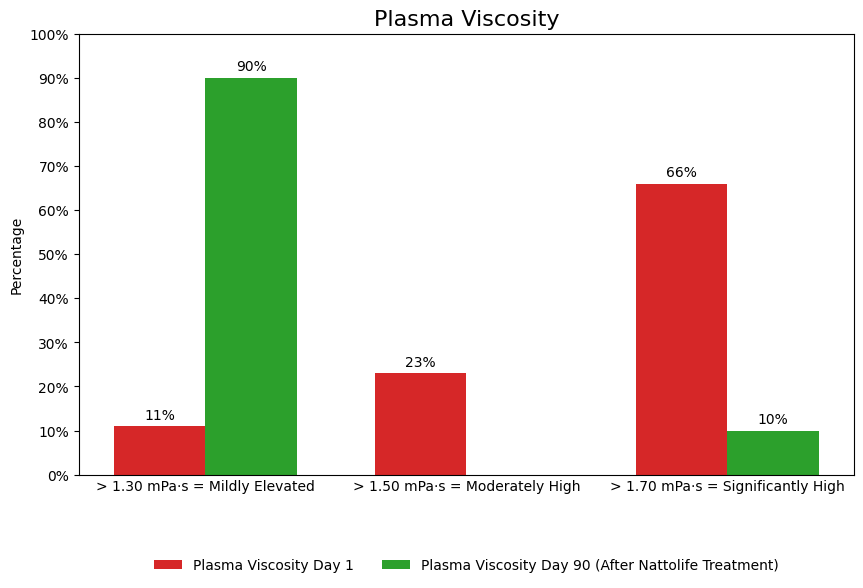

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

# --- Data ---
categories = [
    '> 1.30 mPa·s = Mildly Elevated',
    '> 1.50 mPa·s = Moderately High',
    '> 1.70 mPa·s = Significantly High'
]

day_1_values = [0.11, 0.23, 0.66]
day_90_values = [0.90, 0.00, 0.10]

day_1_labels = [f'{v*100:.0f}%' for v in day_1_values]
day_90_labels = [f'{v*100:.0f}%' for v in day_90_values]

x = np.arange(len(categories))
width = 0.35

# --- Plot Setup ---
fig, ax = plt.subplots(figsize=(10, 7))

# Plot bars
rects1 = ax.bar(x - width/2, day_1_values, width, label='Plasma Viscosity Day 1', color='tab:red')
rects2 = ax.bar(x + width/2, day_90_values, width, label='Plasma Viscosity Day 90 (After Nattolife Treatment)', color='tab:green')

# Axes and Title Configuration
ax.set_ylabel('Percentage')
ax.set_title('Plasma Viscosity', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10, ha='center')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=2, frameon=False)
ax.tick_params(axis='x', length=0)

# Y-Axis Formatting (Percentages)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.1))

# Data Label Function
def autolabel(rects, labels):
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        if height > 0:
            ax.annotate(label,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=10)

autolabel(rects1, day_1_labels)
autolabel(rects2, day_90_labels)

plt.subplots_adjust(bottom=0.25)

# --- Save Command with SVG Format and 600 DPI ---
# This command will save the file as a Vector Graphic (.svg) with 600 DPI resolution.
plt.savefig('plasma_viscosity_graph.svg', format='svg', dpi=600)
print("File 'plasma_viscosity_graph.svg' generated successfully.")

Plot generation code complete. Run this in Colab/Jupyter to generate: mean_comparison_plot.svg


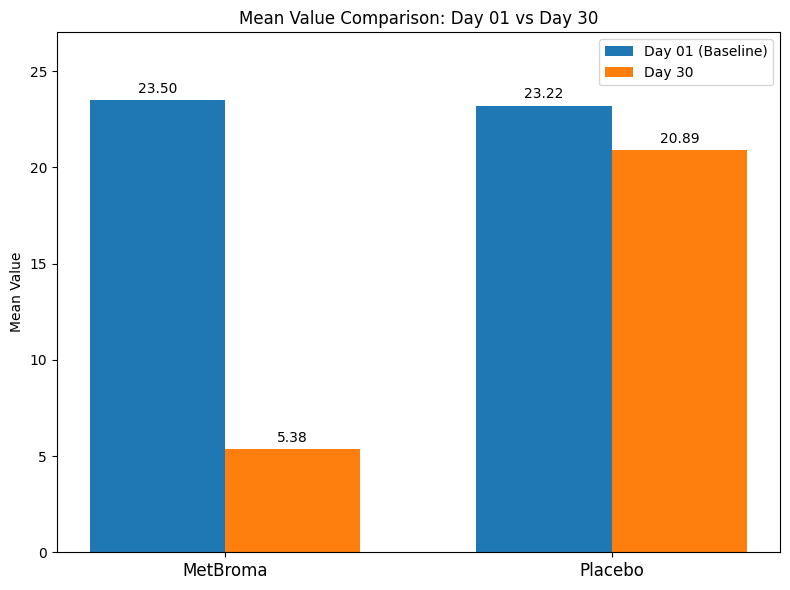

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the Data ---
data = {
    'Group': ['MetBroma', 'Placebo'],
    'Day 01 (Baseline)': [23.50, 23.22],
    'Day 30': [5.38, 20.89]
}
df = pd.DataFrame(data)

# --- 2. Prepare for Plotting ---
categories = df['Group']
day_1_values = df['Day 01 (Baseline)'].values
day_30_values = df['Day 30'].values

x = np.arange(len(categories))
width = 0.35

# --- 3. Create the Plot ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for Day 01 (Baseline)
rects1 = ax.bar(x - width/2, day_1_values, width, label='Day 01 (Baseline)', color='#1f77b4')
# Plot bars for Day 30
rects2 = ax.bar(x + width/2, day_30_values, width, label='Day 30', color='#ff7f0e')

# --- 4. Configure Plot Elements ---
ax.set_title('Mean Value Comparison: Day 01 vs Day 30')
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc='upper right')

# Set Y-axis limits
max_value = max(day_1_values.max(), day_30_values.max())
ax.set_ylim(0, max_value * 1.15)

# --- 5. Add Data Labels on Bars ---
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# --- 6. Save the Plot in SVG Format at 600 DPI ---
file_name = 'mean_comparison_plot.svg'
plt.savefig(file_name, format='svg', dpi=600)

print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: mean_comparison_bar_with_error_bars.svg


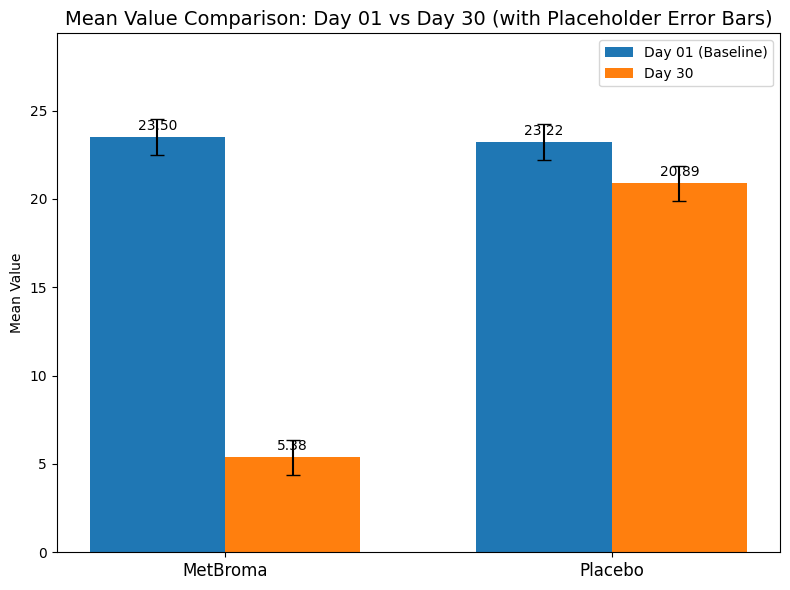

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the Data (Mean) ---
data = {
    'Group': ['MetBroma', 'Placebo'],
    'Day 01 (Baseline)': [23.50, 23.22],
    'Day 30': [5.38, 20.89]
}
df = pd.DataFrame(data)

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
error_day_01 = [1.0, 1.0]  # Placeholder for MetBroma Day 01, Placebo Day 01
error_day_30 = [1.0, 1.0]  # Placeholder for MetBroma Day 30, Placebo Day 30

# --- 3. Prepare for Plotting ---
categories = df['Group']
day_1_values = df['Day 01 (Baseline)'].values
day_30_values = df['Day 30'].values

x = np.arange(len(categories))
width = 0.35

# --- 4. Create the Plot ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for Day 01 (Baseline) with Error Bars
rects1 = ax.bar(x - width/2, day_1_values, width,
                label='Day 01 (Baseline)', color='#1f77b4',
                yerr=error_day_01, capsize=5)

# Plot bars for Day 30 with Error Bars
rects2 = ax.bar(x + width/2, day_30_values, width,
                label='Day 30', color='#ff7f0e',
                yerr=error_day_30, capsize=5)

# --- 5. Configure Plot Elements ---
ax.set_title('Mean Value Comparison: Day 01 vs Day 30 (with Placeholder Error Bars)', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc='upper right')

# Set Y-axis limits
max_value = max(day_1_values.max(), day_30_values.max())
ax.set_ylim(0, max_value * 1.25) # Increased limit to accommodate error bars

# Add Data Labels (Mean)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# --- 6. Save in SVG Format at 600 DPI ---
file_name = 'mean_comparison_bar_with_error_bars.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: mean_comparison_line_with_trendline.svg


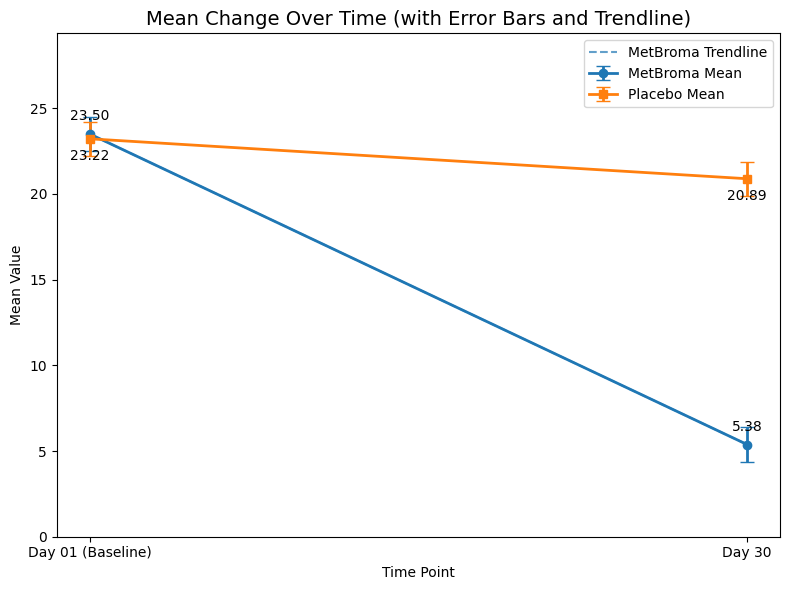

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the Data ---
data = {
    'Time Point': [1, 2], # Use 1 for Day 01 and 2 for Day 30 for trend calculation
    'Day': ['Day 01 (Baseline)', 'Day 30'],
    'MetBroma_Mean': [23.50, 5.38],
    'Placebo_Mean': [23.22, 20.89]
}
df = pd.DataFrame(data)

# --- 2. Define Placeholder Error Data (!!! REPLACE WITH YOUR REAL SD/SEM !!!) ---
# Assuming one error value for each point: (MetBroma Day 01, MetBroma Day 30)
metbroma_error = [1.0, 1.0]
placebo_error = [1.0, 1.0]

# --- 3. Create the Plot ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot MetBroma Means with Error Bars
ax.errorbar(df['Day'], df['MetBroma_Mean'], yerr=metbroma_error,
            fmt='-o', color='tab:blue', capsize=5, linewidth=2,
            label='MetBroma Mean')

# Plot Placebo Means with Error Bars
ax.errorbar(df['Day'], df['Placebo_Mean'], yerr=placebo_error,
            fmt='-s', color='tab:orange', capsize=5, linewidth=2,
            label='Placebo Mean')

# --- 4. Add Linear Trendline for MetBroma (as requested) ---
# Calculate a linear fit (y = mx + c) for the MetBroma data
x_points = df['Time Point'].values
y_metbroma = df['MetBroma_Mean'].values
m, c = np.polyfit(x_points, y_metbroma, 1) # 1st degree polynomial (linear)

# Create trendline data points
trendline_x = np.linspace(min(x_points), max(x_points), 100)
trendline_y = m * trendline_x + c

# Plot the trendline (needs to map x_points back to categorical x-axis)
ax.plot(df['Day'], m * x_points + c, linestyle='--', color='tab:blue',
        label='MetBroma Trendline', alpha=0.7)


# --- 5. Configure Plot Elements ---
ax.set_title('Mean Change Over Time (with Error Bars and Trendline)', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xlabel('Time Point')
ax.legend(loc='upper right')

# Add Data Labels (Mean)
for i, txt in enumerate(df['MetBroma_Mean']):
    ax.annotate(f'{txt:.2f}', (df['Day'][i], txt), textcoords="offset points", xytext=(0, 10), ha='center')
for i, txt in enumerate(df['Placebo_Mean']):
    ax.annotate(f'{txt:.2f}', (df['Day'][i], txt), textcoords="offset points", xytext=(0, -15), ha='center') # Offset for Placebo to avoid overlap

# Set Y-axis limits
max_value = max(df['MetBroma_Mean'].max(), df['Placebo_Mean'].max())
ax.set_ylim(0, max_value * 1.25)

fig.tight_layout()

# --- 6. Save in SVG Format at 600 DPI ---
file_name = 'mean_comparison_line_with_trendline.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: mean_comparison_combined_plot.svg


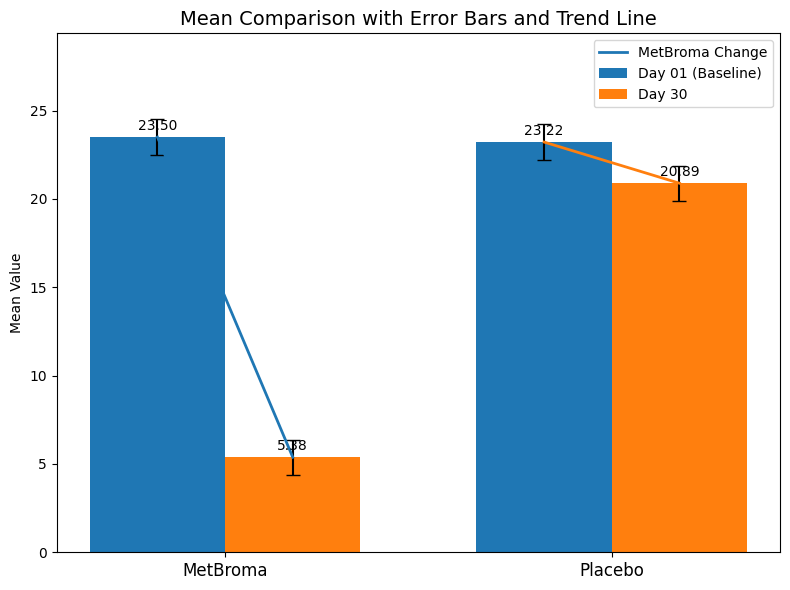

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the Data (Mean) ---
data = {
    'Group': ['MetBroma', 'Placebo'],
    'Day 01 (Baseline)': [23.50, 23.22],
    'Day 30': [5.38, 20.89]
}
df = pd.DataFrame(data)

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
error_day_01 = [1.0, 1.0]  # Placeholder for MetBroma Day 01, Placebo Day 01
error_day_30 = [1.0, 1.0]  # Placeholder for MetBroma Day 30, Placebo Day 30

# --- 3. Prepare for Plotting ---
categories = df['Group']
day_1_values = df['Day 01 (Baseline)'].values
day_30_values = df['Day 30'].values

x = np.arange(len(categories))
width = 0.35

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for Day 01 (Baseline) with Error Bars
rects1 = ax.bar(x - width/2, day_1_values, width,
                label='Day 01 (Baseline)', color='#1f77b4',
                yerr=error_day_01, capsize=5)

# Plot bars for Day 30 with Error Bars
rects2 = ax.bar(x + width/2, day_30_values, width,
                label='Day 30', color='#ff7f0e',
                yerr=error_day_30, capsize=5)

# --- 5. Add "Trendline" (Line connecting means across time) ---

# X-coordinates for Day 01 and Day 30 bars for each group
x_day_1 = x - width/2
x_day_30 = x + width/2

# Plot the connecting lines for the MetBroma and Placebo groups
for i in range(len(categories)):
    # Group-specific color for the connecting line
    line_color = '#1f77b4' if categories[i] == 'MetBroma' else '#ff7f0e'

    ax.plot([x_day_1[i], x_day_30[i]],
            [day_1_values[i], day_30_values[i]],
            linestyle='-', linewidth=2, color=line_color,
            label=f'{categories[i]} Change' if i == 0 else "_nolegend_") # Add legend entry only once

# --- 6. Configure Plot Elements ---
ax.set_title('Mean Comparison with Error Bars and Trend Line', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
# Adjust legend to show all series
ax.legend(loc='upper right', frameon=True)

# Set Y-axis limits
max_value = max(day_1_values.max(), day_30_values.max())
ax.set_ylim(0, max_value * 1.25)

# Add Data Labels (Mean)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'mean_comparison_combined_plot.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: new_mean_comparison_combined_plot.svg


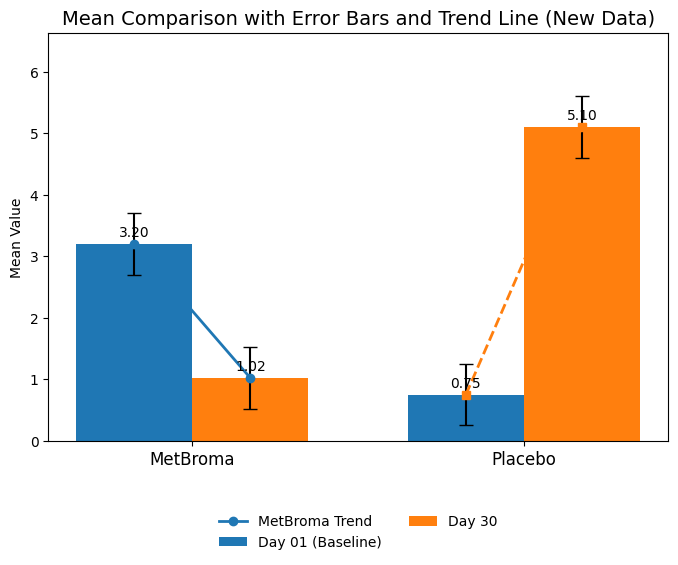

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
data = {
    'Group': ['MetBroma', 'Placebo'],
    'Day 01 (Baseline)': [3.20, 0.75],
    'Day 30': [1.02, 5.10]
}
df = pd.DataFrame(data)

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
# Using +/- 0.5 as a placeholder error value for demonstration.
error_day_01 = [0.5, 0.5]
error_day_30 = [0.5, 0.5]

# --- 3. Prepare for Plotting ---
categories = df['Group']
day_1_values = df['Day 01 (Baseline)'].values
day_30_values = df['Day 30'].values

x = np.arange(len(categories))
width = 0.35

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for Day 01 (Baseline) with Error Bars
rects1 = ax.bar(x - width/2, day_1_values, width,
                label='Day 01 (Baseline)', color='#1f77b4',
                yerr=error_day_01, capsize=5)

# Plot bars for Day 30 with Error Bars
rects2 = ax.bar(x + width/2, day_30_values, width,
                label='Day 30', color='#ff7f0e',
                yerr=error_day_30, capsize=5)

# --- 5. Add "Trendline" (Line connecting means across time) ---

x_day_1 = x - width/2
x_day_30 = x + width/2

# Plot the connecting lines for the MetBroma and Placebo groups
for i in range(len(categories)):
    # Use different line styles for clarity
    line_style = '-' if categories[i] == 'MetBroma' else '--'
    line_color = '#1f77b4' if categories[i] == 'MetBroma' else '#ff7f0e'

    ax.plot([x_day_1[i], x_day_30[i]],
            [day_1_values[i], day_30_values[i]],
            linestyle=line_style, linewidth=2, color=line_color,
            marker='o' if categories[i] == 'MetBroma' else 's',
            label=f'{categories[i]} Trend' if i == 0 else "_nolegend_") # Add legend entry only once

# --- 6. Configure Plot Elements ---
ax.set_title('Mean Comparison with Error Bars and Trend Line (New Data)', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False) # Move legend below plot

# Set Y-axis limits
max_value = max(day_1_values.max(), day_30_values.max())
ax.set_ylim(0, max_value * 1.3)

# Add Data Labels (Mean)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.subplots_adjust(bottom=0.20) # Adjust bottom to fit legend

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'new_mean_comparison_combined_plot.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: new_mean_comparison_combined_plot_error_lines.svg


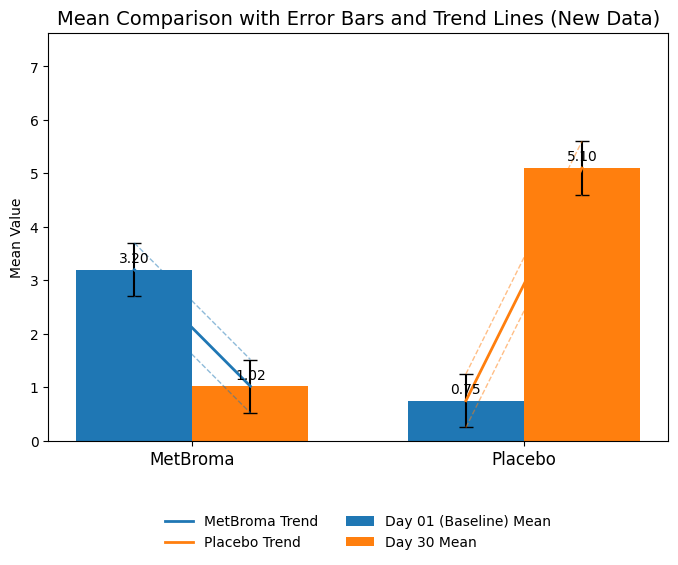

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
data = {
    'Group': ['MetBroma', 'Placebo'],
    'Day 01 (Baseline)': [3.20, 0.75],
    'Day 30': [1.02, 5.10]
}
df = pd.DataFrame(data)

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
error_day_01 = [0.5, 0.5]
error_day_30 = [0.5, 0.5]

# --- 3. Prepare for Plotting ---
categories = df['Group']
day_1_values = df['Day 01 (Baseline)'].values
day_30_values = df['Day 30'].values

x = np.arange(len(categories))
width = 0.35

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for Day 01 (Baseline) with Error Bars
rects1 = ax.bar(x - width/2, day_1_values, width,
                label='Day 01 (Baseline) Mean', color='#1f77b4',
                yerr=error_day_01, capsize=5)

# Plot bars for Day 30 with Error Bars
rects2 = ax.bar(x + width/2, day_30_values, width,
                label='Day 30 Mean', color='#ff7f0e',
                yerr=error_day_30, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

x_day_1 = x - width/2
x_day_30 = x + width/2

metbroma_color = '#1f77b4'
placebo_color = '#ff7f0e'

# Iterate through groups to plot trendlines and error connections
for i in range(len(categories)):
    group = categories[i]
    color = metbroma_color if group == 'MetBroma' else placebo_color
    y1_mean = day_1_values[i]
    y2_mean = day_30_values[i]
    e1 = error_day_01[i]
    e2 = error_day_30[i]

    # 5a. Plot the Mean Trend Line (connecting the means)
    ax.plot([x_day_1[i], x_day_30[i]],
            [y1_mean, y2_mean],
            linestyle='-', linewidth=2, color=color,
            label=f'{group} Trend')

    # 5b. Plot the Error Lines (connecting the error caps)
    # Lower Error Line
    ax.plot([x_day_1[i], x_day_30[i]],
            [y1_mean - e1, y2_mean - e2],
            linestyle='--', linewidth=1, color=color, alpha=0.5)

    # Upper Error Line
    ax.plot([x_day_1[i], x_day_30[i]],
            [y1_mean + e1, y2_mean + e2],
            linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- 6. Configure Plot Elements ---
ax.set_title('Mean Comparison with Error Bars and Trend Lines (New Data)', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend to show main bar means and the general trend
handles, labels = ax.get_legend_handles_labels()
# Filter out the redundant "Trend" label after the first one
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(day_1_values.max(), day_30_values.max())
# Adjusted to ensure upper error line is visible
ax.set_ylim(0, max_value * 1.3 + max(error_day_01) + max(error_day_30))

# Add Data Labels (Mean)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'new_mean_comparison_combined_plot_error_lines.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: new_mean_comparison_combined_plot_error_lines.svg


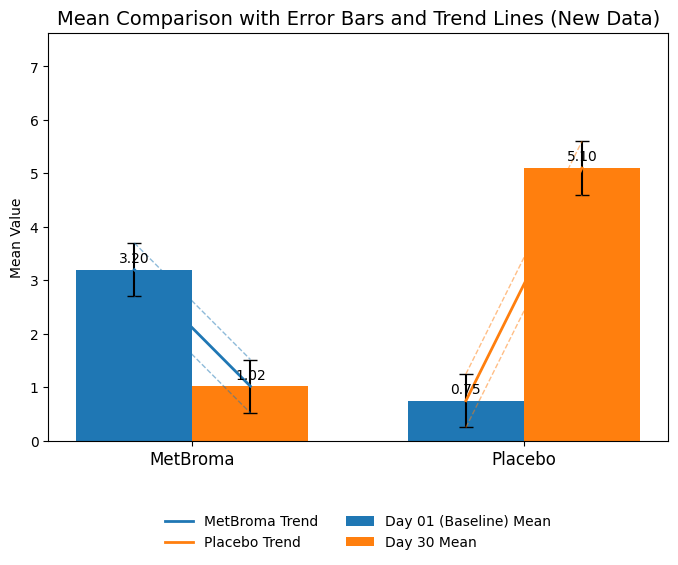

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
data = {
    'Group': ['MetBroma', 'Placebo'],
    'Day 01 (Baseline)': [3.20, 0.75],
    'Day 30': [1.02, 5.10]
}
df = pd.DataFrame(data)

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
error_day_01 = [0.5, 0.5]
error_day_30 = [0.5, 0.5]

# --- 3. Prepare for Plotting ---
categories = df['Group']
day_1_values = df['Day 01 (Baseline)'].values
day_30_values = df['Day 30'].values

x = np.arange(len(categories))
width = 0.35

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for Day 01 (Baseline) with Error Bars
rects1 = ax.bar(x - width/2, day_1_values, width,
                label='Day 01 (Baseline) Mean', color='#1f77b4',
                yerr=error_day_01, capsize=5)

# Plot bars for Day 30 with Error Bars
rects2 = ax.bar(x + width/2, day_30_values, width,
                label='Day 30 Mean', color='#ff7f0e',
                yerr=error_day_30, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

x_day_1 = x - width/2
x_day_30 = x + width/2

metbroma_color = '#1f77b4'
placebo_color = '#ff7f0e'

# Iterate through groups to plot trendlines and error connections
for i in range(len(categories)):
    group = categories[i]
    color = metbroma_color if group == 'MetBroma' else placebo_color
    y1_mean = day_1_values[i]
    y2_mean = day_30_values[i]
    e1 = error_day_01[i]
    e2 = error_day_30[i]

    # 5a. Plot the Mean Trend Line (connecting the means)
    ax.plot([x_day_1[i], x_day_30[i]],
            [y1_mean, y2_mean],
            linestyle='-', linewidth=2, color=color,
            label=f'{group} Trend')

    # 5b. Plot the Error Lines (connecting the error caps)
    # Lower Error Line
    ax.plot([x_day_1[i], x_day_30[i]],
            [y1_mean - e1, y2_mean - e2],
            linestyle='--', linewidth=1, color=color, alpha=0.5)

    # Upper Error Line
    ax.plot([x_day_1[i], x_day_30[i]],
            [y1_mean + e1, y2_mean + e2],
            linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- 6. Configure Plot Elements ---
ax.set_title('Mean Comparison with Error Bars and Trend Lines (New Data)', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend to show main bar means and the general trend
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(day_1_values.max(), day_30_values.max())
ax.set_ylim(0, max_value * 1.3 + max(error_day_01) + max(error_day_30))

# Add Data Labels (Mean)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1)
autolabel(rects2)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'new_mean_comparison_combined_plot_error_lines.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: mean_comparison_grouped_by_time.svg


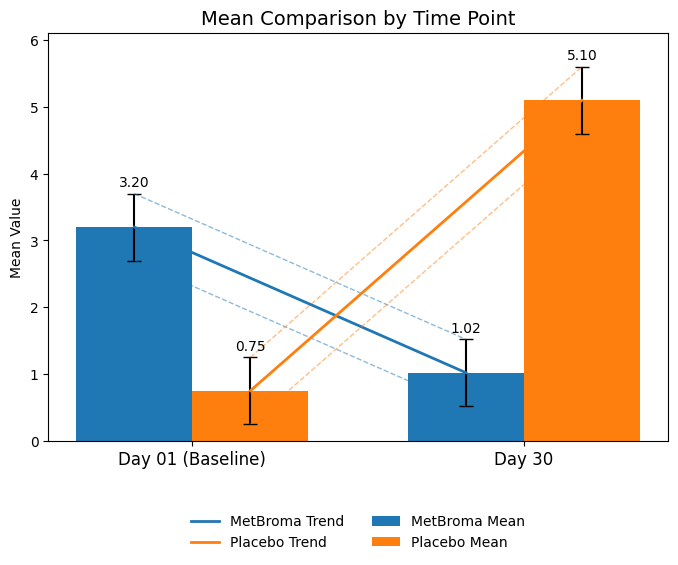

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the Data (Mean) Transposed for Grouping by Time Point ---
# The X-axis categories will be Day 01 and Day 30
categories = ['Day 01 (Baseline)', 'Day 30']

# Values for the first cluster (MetBroma)
metbroma_values = [3.20, 1.02]
# Values for the second cluster (Placebo)
placebo_values = [0.75, 5.10]

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
metbroma_error = [0.5, 0.5]
placebo_error = [0.5, 0.5]

# --- 3. Prepare for Plotting ---
x = np.arange(len(categories))
width = 0.35

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for MetBroma (Bar 1 in each cluster)
rects1 = ax.bar(x - width/2, metbroma_values, width,
                label='MetBroma Mean', color='#1f77b4',
                yerr=metbroma_error, capsize=5)

# Plot bars for Placebo (Bar 2 in each cluster)
rects2 = ax.bar(x + width/2, placebo_values, width,
                label='Placebo Mean', color='#ff7f0e',
                yerr=placebo_error, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

# X-coordinates for MetBroma (first bar in cluster) and Placebo (second bar in cluster)
x_metbroma = x - width/2
x_placebo = x + width/2

# --- MetBroma Trendline ---
y_metbroma = metbroma_values
e_metbroma = metbroma_error
color = '#1f77b4'

# Plot the Mean Trend Line (connecting MetBroma means across time)
ax.plot(x_metbroma, y_metbroma,
        linestyle='-', linewidth=2, color=color,
        label=f'MetBroma Trend')

# Plot the Error Lines (connecting the error caps)
ax.plot(x_metbroma, [y_metbroma[i] - e_metbroma[i] for i in range(len(y_metbroma))],
        linestyle='--', linewidth=1, color=color, alpha=0.5) # Lower Error Line
ax.plot(x_metbroma, [y_metbroma[i] + e_metbroma[i] for i in range(len(y_metbroma))],
        linestyle='--', linewidth=1, color=color, alpha=0.5) # Upper Error Line


# --- Placebo Trendline ---
y_placebo = placebo_values
e_placebo = placebo_error
color = '#ff7f0e'

# Plot the Mean Trend Line (connecting Placebo means across time)
ax.plot(x_placebo, y_placebo,
        linestyle='-', linewidth=2, color=color,
        label=f'Placebo Trend')

# Plot the Error Lines (connecting the error caps)
ax.plot(x_placebo, [y_placebo[i] - e_placebo[i] for i in range(len(y_placebo))],
        linestyle='--', linewidth=1, color=color, alpha=0.5) # Lower Error Line
ax.plot(x_placebo, [y_placebo[i] + e_placebo[i] for i in range(len(y_placebo))],
        linestyle='--', linewidth=1, color=color, alpha=0.5) # Upper Error Line


# --- 6. Configure Plot Elements ---
ax.set_title('Mean Comparison by Time Point', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend to show all unique series
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(max(metbroma_values), max(placebo_values))
max_error = max(max(metbroma_error), max(placebo_error))
ax.set_ylim(0, max_value * 1.1 + max_error)

# Add Data Labels (Mean)
def autolabel(rects, error_values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1, metbroma_error)
autolabel(rects2, placebo_error)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'mean_comparison_grouped_by_time.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Reusable Plotting Function ---
def create_combined_time_point_plot(
    metbroma_values, placebo_values,
    metbroma_error, placebo_error,
    title, file_name,
    categories=['Day 01 (Baseline)', 'Day 30']
):
    """
    Generates a clustered column chart with error bars and trendlines (mean/error lines).
    Saves the output as an SVG file at 600 DPI.
    """
    x = np.arange(len(categories))
    width = 0.35
    metbroma_color = '#1f77b4'
    placebo_color = '#ff7f0e'

    fig, ax = plt.subplots(figsize=(8, 6))

    # 4. Bar Plot with Error Bars (Grouped by Time Point)
    rects1 = ax.bar(x - width/2, metbroma_values, width,
                    label='MetBroma Mean', color=metbroma_color,
                    yerr=metbroma_error, capsize=5)

    rects2 = ax.bar(x + width/2, placebo_values, width,
                    label='Placebo Mean', color=placebo_color,
                    yerr=placebo_error, capsize=5)

    # 5. Add Connecting Lines (Trendline and Error Lines)
    x_metbroma = x - width/2
    x_placebo = x + width/2

    # --- MetBroma Trendline & Error Lines ---
    y_metbroma = metbroma_values
    e_metbroma = metbroma_error

    # Plot the Mean Trend Line
    ax.plot(x_metbroma, y_metbroma, linestyle='-', linewidth=2, color=metbroma_color,
            label=f'MetBroma Trend')

    # Plot the Error Lines (connecting the error caps)
    ax.plot(x_metbroma, [y_metbroma[i] - e_metbroma[i] for i in range(len(y_metbroma))],
            linestyle='--', linewidth=1, color=metbroma_color, alpha=0.5)
    ax.plot(x_metbroma, [y_metbroma[i] + e_metbroma[i] for i in range(len(y_metbroma))],
            linestyle='--', linewidth=1, color=metbroma_color, alpha=0.5)

    # --- Placebo Trendline & Error Lines ---
    y_placebo = placebo_values
    e_placebo = placebo_error

    # Plot the Mean Trend Line
    ax.plot(x_placebo, y_placebo, linestyle='-', linewidth=2, color=placebo_color,
            label=f'Placebo Trend')

    # Plot the Error Lines (connecting the error caps)
    ax.plot(x_placebo, [y_placebo[i] - e_placebo[i] for i in range(len(y_placebo))],
            linestyle='--', linewidth=1, color=placebo_color, alpha=0.5)
    ax.plot(x_placebo, [y_placebo[i] + e_placebo[i] for i in range(len(y_placebo))],
            linestyle='--', linewidth=1, color=placebo_color, alpha=0.5)


    # 6. Configure Plot Elements
    ax.set_title(f'{title} Mean Comparison by Time Point', fontsize=14)
    ax.set_ylabel(f'Mean {title} Value')
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=12)

    # Legend & Limits
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(dict.fromkeys(labels))
    unique_handles = [handles[labels.index(l)] for l in unique_labels]
    ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

    max_value = max(max(metbroma_values), max(placebo_values))
    max_error = max(max(metbroma_error), max(placebo_error))
    # Adjusted to ensure upper error line is visible
    ax.set_ylim(0, max_value * 1.1 + max_error)

    # Add Data Labels (Mean)
    def autolabel(rects, error_values):
        for i, rect in enumerate(rects):
            height = rect.get_height()
            # Position label above the error cap
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=10)

    autolabel(rects1, metbroma_error)
    autolabel(rects2, placebo_error)

    plt.subplots_adjust(bottom=0.20)

    # Save in SVG Format at 600 DPI
    plt.savefig(file_name, format='svg', dpi=600)
    plt.close(fig)
    print(f"✅ Generated plot: {file_name}")

# =========================================================================
# --- Data Definition and Function Calls ---
# =========================================================================

# --- PLACEHOLDER ERROR DEFINITION (USE YOUR REAL SD/SEM HERE!) ---
# Used for both IL6 and CRP
placeholder_error = [0.6, 0.6]

# --- IL6 Data ---
IL6_metbroma_means = [3.20, 1.02]
IL6_placebo_means = [0.75, 5.10]
IL6_file = 'IL6_combined_plot.svg'

create_combined_time_point_plot(
    metbroma_values=IL6_metbroma_means,
    placebo_values=IL6_placebo_means,
    metbroma_error=placeholder_error,
    placebo_error=placeholder_error,
    title='IL6',
    file_name=IL6_file
)

# --- CRP Data ---
CRP_metbroma_means = [3.90, 0.78]
CRP_placebo_means = [3.30, 7.37]
CRP_file = 'CRP_combined_plot.svg'

create_combined_time_point_plot(
    metbroma_values=CRP_metbroma_means,
    placebo_values=CRP_placebo_means,
    metbroma_error=placeholder_error,
    placebo_error=placeholder_error,
    title='CRP',
    file_name=CRP_file
)

✅ Generated plot: IL6_combined_plot.svg
✅ Generated plot: CRP_combined_plot.svg


Plot generation code complete. Run this in Colab/Jupyter to generate: IL6_CRP_combined_plot.svg


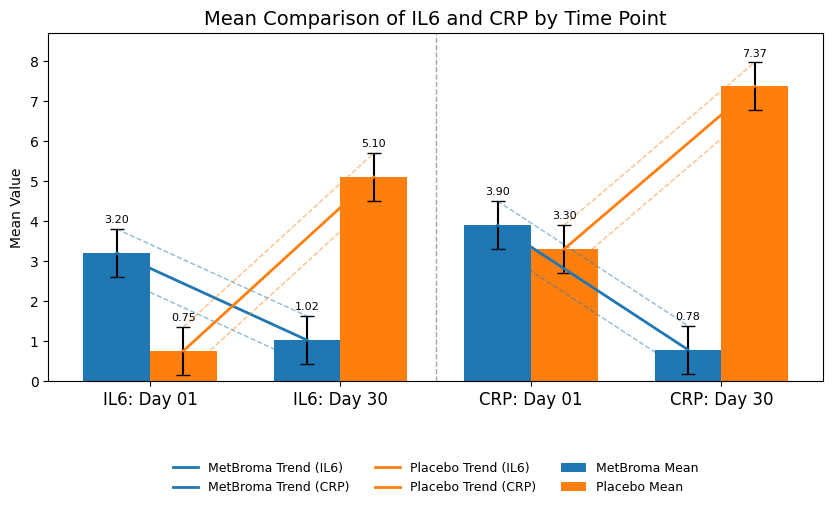

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the COMBINED Data Sets ---
# X-axis Categories: Cytokine + Time Point
categories = ['IL6: Day 01', 'IL6: Day 30', 'CRP: Day 01', 'CRP: Day 30']

# Data arranged in the order of the categories array:
# [IL6_D1, IL6_D30, CRP_D1, CRP_D30]

# MetBroma Means
metbroma_values = [3.20, 1.02, 3.90, 0.78]
# Placebo Means
placebo_values = [0.75, 5.10, 3.30, 7.37]

# --- 2. Define Placeholder Error Data (!!! REPLACE WITH YOUR REAL SD/SEM !!!) ---
placeholder_error = 0.6
metbroma_error = [placeholder_error] * 4
placebo_error = [placeholder_error] * 4

# --- 3. Prepare for Plotting ---
x = np.arange(len(categories)) # [0, 1, 2, 3]
width = 0.35
metbroma_color = '#1f77b4'
placebo_color = '#ff7f0e'

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for MetBroma
rects1 = ax.bar(x - width/2, metbroma_values, width,
                label='MetBroma Mean', color=metbroma_color,
                yerr=metbroma_error, capsize=5)

# Plot bars for Placebo
rects2 = ax.bar(x + width/2, placebo_values, width,
                label='Placebo Mean', color=placebo_color,
                yerr=placebo_error, capsize=5)

# --- 5. Add Connecting Lines (Trendlines and Error Lines) ---
x_metbroma = x - width/2
x_placebo = x + width/2

# --- Trendline function for non-contiguous segments ---
def plot_segment_trends(x_coords, y_means, y_errors, color, label_prefix):

    # Define segments (IL6 is index 0-1, CRP is index 2-3)
    segments = [(0, 2), (2, 4)]

    for start, end in segments:
        x_segment = x_coords[start:end]
        y_segment = y_means[start:end]
        e_segment = y_errors[start:end]

        # Determine if this is the IL6 or CRP segment for labeling
        current_label = f'{label_prefix} Trend (IL6)' if start == 0 else f'{label_prefix} Trend (CRP)'

        # Plot the Mean Trend Line
        ax.plot(x_segment, y_segment,
                linestyle='-', linewidth=2, color=color,
                label=current_label)

        # Plot the Error Lines (connecting the error caps)
        y_lower = [y_segment[i] - e_segment[i] for i in range(len(y_segment))]
        y_upper = [y_segment[i] + e_segment[i] for i in range(len(y_segment))]

        ax.plot(x_segment, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
        ax.plot(x_segment, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)

# Plot MetBroma Trends
plot_segment_trends(x_metbroma, metbroma_values, metbroma_error, metbroma_color, 'MetBroma')

# Plot Placebo Trends
plot_segment_trends(x_placebo, placebo_values, placebo_error, placebo_color, 'Placebo')


# --- 6. Configure Plot Elements ---
ax.set_title('Mean Comparison of IL6 and CRP by Time Point', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Add vertical lines to clearly separate the IL6 and CRP experiments
ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Legend & Limits
handles, labels = ax.get_legend_handles_labels()
# Filter out redundant labels for a clean legend
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, fontsize=9)

max_value = max(max(metbroma_values), max(placebo_values))
max_error = max(max(metbroma_error), max(placebo_error))
ax.set_ylim(0, max_value * 1.1 + max_error)

# Add Data Labels (Mean)
def autolabel(rects, error_values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)

autolabel(rects1, metbroma_error)
autolabel(rects2, placebo_error)

plt.subplots_adjust(bottom=0.30)

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'IL6_CRP_combined_plot.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: MetDigestenz_comparison_plot.svg


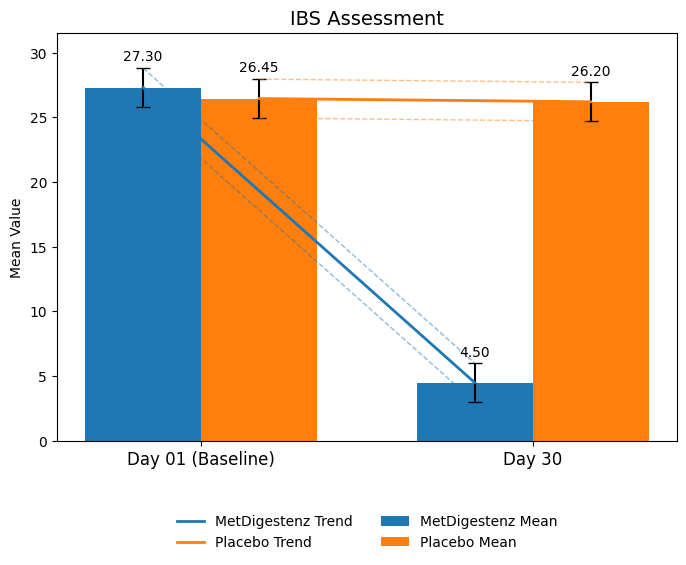

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
# The X-axis categories will be Day 01 and Day 30
categories = ['Day 01 (Baseline)', 'Day 30']

# Values for the first cluster (MetDigestenz)
metdigestenz_values = [27.30, 4.50]
# Values for the second cluster (Placebo)
placebo_values = [26.45, 26.20]

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
placeholder_error = 1.5
metdigestenz_error = [placeholder_error, placeholder_error]
placebo_error = [placeholder_error, placeholder_error]

# --- 3. Prepare for Plotting ---
x = np.arange(len(categories))
width = 0.35
metdigestenz_color = '#1f77b4' # Blue
placebo_color = '#ff7f0e'      # Orange

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for MetDigestenz
rects1 = ax.bar(x - width/2, metdigestenz_values, width,
                label='MetDigestenz Mean', color=metdigestenz_color,
                yerr=metdigestenz_error, capsize=5)

# Plot bars for Placebo
rects2 = ax.bar(x + width/2, placebo_values, width,
                label='Placebo Mean', color=placebo_color,
                yerr=placebo_error, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

# X-coordinates for MetDigestenz (first bar in cluster) and Placebo (second bar in cluster)
x_metdigestenz = x - width/2
x_placebo = x + width/2

# --- MetDigestenz Trendline & Error Lines ---
y_metdigestenz = metdigestenz_values
e_metdigestenz = metdigestenz_error
color = metdigestenz_color

# Plot the Mean Trend Line
ax.plot(x_metdigestenz, y_metdigestenz,
        linestyle='-', linewidth=2, color=color,
        label=f'MetDigestenz Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_metdigestenz[i] - e_metdigestenz[i] for i in range(len(y_metdigestenz))]
y_upper = [y_metdigestenz[i] + e_metdigestenz[i] for i in range(len(y_metdigestenz))]
ax.plot(x_metdigestenz, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_metdigestenz, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- Placebo Trendline & Error Lines ---
y_placebo = placebo_values
e_placebo = placebo_error
color = placebo_color

# Plot the Mean Trend Line
ax.plot(x_placebo, y_placebo,
        linestyle='-', linewidth=2, color=color,
        label=f'Placebo Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_placebo[i] - e_placebo[i] for i in range(len(y_placebo))]
y_upper = [y_placebo[i] + e_placebo[i] for i in range(len(y_placebo))]
ax.plot(x_placebo, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_placebo, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- 6. Configure Plot Elements ---
ax.set_title('IBS Assessment', fontsize=14)
ax.set_ylabel('Mean Value')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(max(metdigestenz_values), max(placebo_values))
max_error = max(max(metdigestenz_error), max(placebo_error))
ax.set_ylim(0, max_value * 1.1 + max_error)

# Add Data Labels (Mean)
def autolabel(rects, error_values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1, metdigestenz_error)
autolabel(rects2, placebo_error)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'MetDigestenz_comparison_plot.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: pain_tenderness_plot.svg


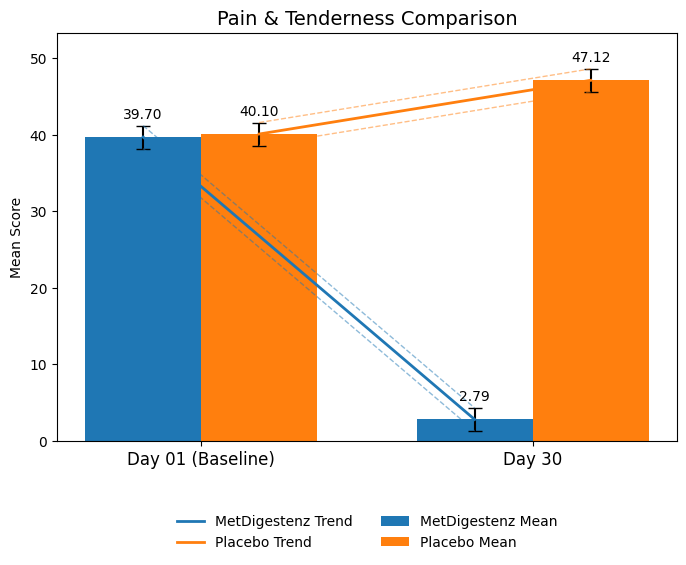

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
# X-axis categories
categories = ['Day 01 (Baseline)', 'Day 30']

# Values for the first cluster (MetDigestenz)
metdigestenz_values = [39.70, 2.79]
# Values for the second cluster (Placebo)
placebo_values = [40.10, 47.12]

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
placeholder_error = 1.5
metdigestenz_error = [placeholder_error, placeholder_error]
placebo_error = [placeholder_error, placeholder_error]

# --- 3. Prepare for Plotting ---
x = np.arange(len(categories))
width = 0.35
metdigestenz_color = '#1f77b4' # Blue
placebo_color = '#ff7f0e'      # Orange

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for MetDigestenz
rects1 = ax.bar(x - width/2, metdigestenz_values, width,
                label='MetDigestenz Mean', color=metdigestenz_color,
                yerr=metdigestenz_error, capsize=5)

# Plot bars for Placebo
rects2 = ax.bar(x + width/2, placebo_values, width,
                label='Placebo Mean', color=placebo_color,
                yerr=placebo_error, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

# X-coordinates for MetDigestenz and Placebo
x_metdigestenz = x - width/2
x_placebo = x + width/2

# --- MetDigestenz Trendline & Error Lines ---
y_metdigestenz = metdigestenz_values
e_metdigestenz = metdigestenz_error
color = metdigestenz_color

# Plot the Mean Trend Line
ax.plot(x_metdigestenz, y_metdigestenz,
        linestyle='-', linewidth=2, color=color,
        label=f'MetDigestenz Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_metdigestenz[i] - e_metdigestenz[i] for i in range(len(y_metdigestenz))]
y_upper = [y_metdigestenz[i] + e_metdigestenz[i] for i in range(len(y_metdigestenz))]
ax.plot(x_metdigestenz, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_metdigestenz, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- Placebo Trendline & Error Lines ---
y_placebo = placebo_values
e_placebo = placebo_error
color = placebo_color

# Plot the Mean Trend Line
ax.plot(x_placebo, y_placebo,
        linestyle='-', linewidth=2, color=color,
        label=f'Placebo Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_placebo[i] - e_placebo[i] for i in range(len(y_placebo))]
y_upper = [y_placebo[i] + e_placebo[i] for i in range(len(y_placebo))]
ax.plot(x_placebo, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_placebo, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- 6. Configure Plot Elements ---
ax.set_title('Pain & Tenderness Comparison', fontsize=14)
ax.set_ylabel('Mean Score')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(max(metdigestenz_values), max(placebo_values))
max_error = max(max(metdigestenz_error), max(placebo_error))
ax.set_ylim(0, max_value * 1.1 + max_error)

# Add Data Labels (Mean)
def autolabel(rects, error_values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1, metdigestenz_error)
autolabel(rects2, placebo_error)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'pain_tenderness_plot.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: bp_distribution_comparison.svg


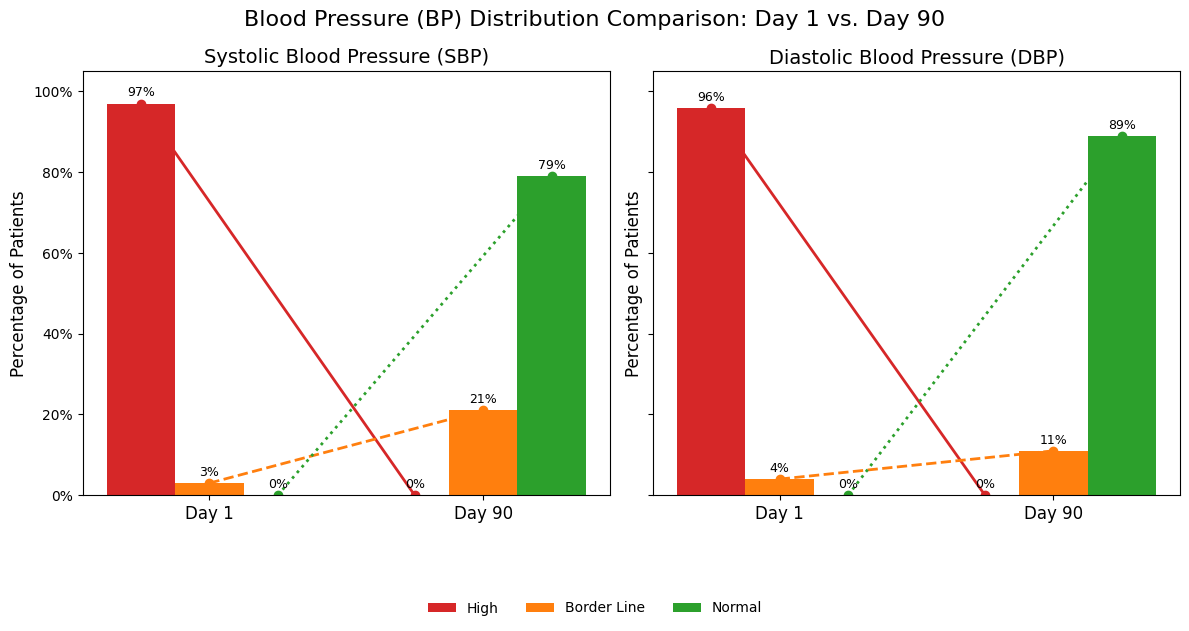

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Define the Data (Convert to decimal for plotting) ---
data = {
    'Time Point': ['Day 1', 'Day 90'],
    'SBP_High': [0.97, 0.00],
    'SBP_Border Line': [0.03, 0.21],
    'SBP_Normal': [0.00, 0.79],
    'DBP_High': [0.96, 0.00],
    'DBP_Border Line': [0.04, 0.11],
    'DBP_Normal': [0.00, 0.89]
}
df = pd.DataFrame(data)

# --- 2. Plotting Parameters ---
categories = df['Time Point']
x = np.arange(len(categories))  # [0, 1]
width = 0.25  # Width of each bar
bar_offset = width / 2
colors = ['#d62728', '#ff7f0e', '#2ca02c'] # Red (High), Orange (Border), Green (Normal)
labels = ['High', 'Border Line', 'Normal']
line_styles = ['-', '--', ':']

# --- 3. Create the Figure with Two Subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Blood Pressure (BP) Distribution Comparison: Day 1 vs. Day 90', fontsize=16)

# --- Reusable Plotting Function for each Subplot ---
def plot_bp_distribution(ax, df, prefix, title):
    # Extract data for the current subplot (e.g., 'SBP_High', 'SBP_Border Line', etc.)
    high_vals = df[f'{prefix}_High'].values
    border_vals = df[f'{prefix}_Border Line'].values
    normal_vals = df[f'{prefix}_Normal'].values

    all_values = [high_vals, border_vals, normal_vals]

    # Plot the three clustered bars (High, Border, Normal) at each time point
    rects = []
    for i in range(3):
        # Calculate X position for the i-th bar in the cluster
        x_pos = x + (i - 1) * width

        # Plot the bars
        rect = ax.bar(x_pos, all_values[i], width, label=labels[i], color=colors[i])
        rects.append(rect)

        # Add Trendline (line connecting the same category across time)
        ax.plot(x_pos, all_values[i],
                marker='o', linestyle=line_styles[i], linewidth=2, color=colors[i],
                label='_nolegend_')

        # Add Data Labels (Percentages)
        for j, rect_single in enumerate(rect):
            height = rect_single.get_height()
            ax.annotate(f'{height*100:.0f}%',
                        xy=(rect_single.get_x() + rect_single.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9)

    # Configure the subplot
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Percentage of Patients', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=12)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
    ax.set_ylim(0, 1.05)


# --- Plot SBP ---
plot_bp_distribution(ax1, df, 'SBP', 'Systolic Blood Pressure (SBP)')

# --- Plot DBP ---
plot_bp_distribution(ax2, df, 'DBP', 'Diastolic Blood Pressure (DBP)')

# Global legend
fig.legend(ax1.containers, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

fig.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust for suptitle and legend

# --- 7. Save in SVG Format at 600 DPI ---
file_name = 'bp_distribution_comparison.svg'
plt.savefig(file_name, format='svg', dpi=600)
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: bp_distribution_comparison.svg


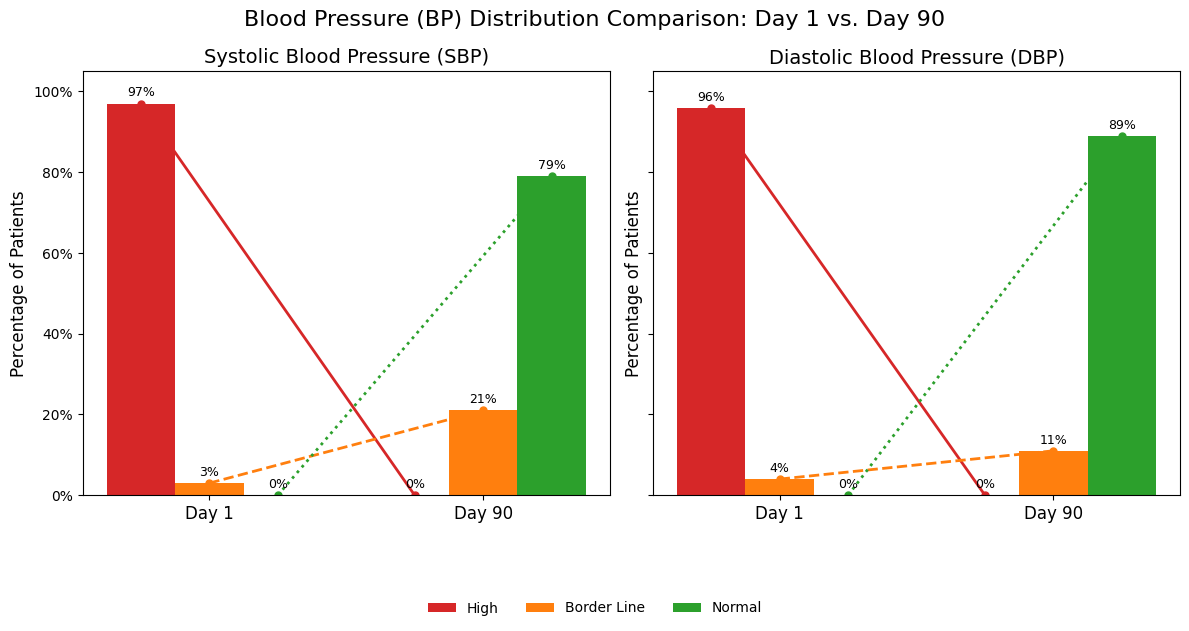

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Define the Data (Convert to decimal for plotting) ---
data = {
    'Time Point': ['Day 1', 'Day 90'],
    'SBP_High': [0.97, 0.00],
    'SBP_Border Line': [0.03, 0.21],
    'SBP_Normal': [0.00, 0.79],
    'DBP_High': [0.96, 0.00],
    'DBP_Border Line': [0.04, 0.11],
    'DBP_Normal': [0.00, 0.89]
}
df = pd.DataFrame(data)

# --- 2. Plotting Parameters ---
categories = df['Time Point']
x = np.arange(len(categories))  # [0, 1]
width = 0.25  # Width of each bar
colors = ['#d62728', '#ff7f0e', '#2ca02c'] # Red (High), Orange (Border), Green (Normal)
labels = ['High', 'Border Line', 'Normal']
line_styles = ['-', '--', ':']

# --- 3. Create the Figure with Two Subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Blood Pressure (BP) Distribution Comparison: Day 1 vs. Day 90', fontsize=16)

# --- Reusable Plotting Function for each Subplot ---
def plot_bp_distribution(ax, df, prefix, title):

    high_vals = df[f'{prefix}_High'].values
    border_vals = df[f'{prefix}_Border Line'].values
    normal_vals = df[f'{prefix}_Normal'].values
    all_values = [high_vals, border_vals, normal_vals]

    rects = []
    for i in range(3):
        # Calculate X position for the i-th bar in the cluster
        x_pos = x + (i - 1) * width

        # Plot the bars
        rect = ax.bar(x_pos, all_values[i], width, label=labels[i], color=colors[i])
        rects.append(rect)

        # Add Trendline (line connecting the same category across time)
        ax.plot(x_pos, all_values[i],
                marker='o', linestyle=line_styles[i], linewidth=2, color=colors[i],
                markersize=5,
                label='_nolegend_')

        # Add Data Labels (Percentages)
        for j, rect_single in enumerate(rect):
            height = rect_single.get_height()
            ax.annotate(f'{height*100:.0f}%',
                        xy=(rect_single.get_x() + rect_single.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9)

    # Configure the subplot
    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Percentage of Patients', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=12)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
    ax.set_ylim(0, 1.05)


# --- Plot SBP ---
plot_bp_distribution(ax1, df, 'SBP', 'Systolic Blood Pressure (SBP)')

# --- Plot DBP ---
plot_bp_distribution(ax2, df, 'DBP', 'Diastolic Blood Pressure (DBP)')

# Global legend
fig.legend(ax1.containers, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

fig.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust for suptitle and manual legend placement

# --- 7. Save in SVG Format at 600 DPI (FIXED) ---
file_name = 'bp_distribution_comparison.svg'
# *** THE FIX IS HERE: bbox_inches='tight' ***
plt.savefig(file_name, format='svg', dpi=600, bbox_inches='tight')
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- 1. Define the Data (Convert to decimal for plotting) ---
# Data is interpreted as three mutually exclusive categories summing to 100% at each time point.
data = {
    'Time Point': ['Day 1', 'Day 90'],
    'Mildly Elevated': [0.11, 0.90],  # > 1.30 mPa·s
    'Moderately High': [0.23, 0.00],  # > 1.50 mPa·s
    'Significantly High': [0.66, 0.10], # > 1.70 mPa·s
}
df = pd.DataFrame(data)

# --- 2. Plotting Parameters ---
categories = df['Time Point']
x = np.arange(len(categories))  # [0, 1]
width = 0.25  # Width of each bar

# Define colors and labels for the three viscosity bands
colors = ['#1f77b4', '#ff7f0e', '#d62728'] # Blue, Orange, Red
labels = ['> 1.30 mPa·s (Mildly Elevated)',
          '> 1.50 mPa·s (Moderately High)',
          '> 1.70 mPa·s (Significantly High)']
line_styles = ['-', '--', ':']

# Extract data arrays
mildly_vals = df['Mildly Elevated'].values
moderately_vals = df['Moderately High'].values
significantly_vals = df['Significantly High'].values
all_values = [mildly_vals, moderately_vals, significantly_vals]

# --- 3. Create the Figure ---
fig, ax = plt.subplots(figsize=(8, 6))

# --- 4. Plot the three clustered bars (High, Border, Normal) at each time point ---
rects = []
for i in range(3):
    # Calculate X position for the i-th bar in the cluster
    # Shifts bars left, center, and right relative to the x-tick
    x_pos = x + (i - 1) * width

    # Plot the bars
    rect = ax.bar(x_pos, all_values[i], width, label=labels[i], color=colors[i])
    rects.append(rect)

    # Add Trendline (line connecting the same category across time)
    ax.plot(x_pos, all_values[i],
            marker='o', linestyle=line_styles[i], linewidth=2, color=colors[i],
            markersize=5,
            label='_nolegend_')

    # Add Data Labels (Percentages)
    for j, rect_single in enumerate(rect):
        height = rect_single.get_height()
        ax.annotate(f'{height*100:.0f}%',
                    xy=(rect_single.get_x() + rect_single.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

# --- 5. Configure Plot Elements ---
ax.set_title('Plasma Viscosity Distribution: Day 1 vs. Day 90', fontsize=14)
ax.set_ylabel('Percentage of Patients', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
ax.set_ylim(0, 1.05)

# Global legend
handles, labels_unique = ax.get_legend_handles_labels()
# Filter out trend line labels, keeping only bar labels
ax.legend(handles[:3], labels[:3], loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=1, frameon=False)

plt.subplots_adjust(bottom=0.25) # Manual adjustment for the legend area

# --- 6. Save in SVG Format at 600 DPI (FIXED) ---
file_name = 'plasma_viscosity_distribution.svg'
# *** Using bbox_inches='tight' to ensure the external legend is included ***
plt.savefig(file_name, format='svg', dpi=600, bbox_inches='tight')
plt.close(fig)

print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: plasma_viscosity_distribution.svg


Plot generation code complete. Run this in Colab/Jupyter to generate: swelling_inflammation_plot.svg


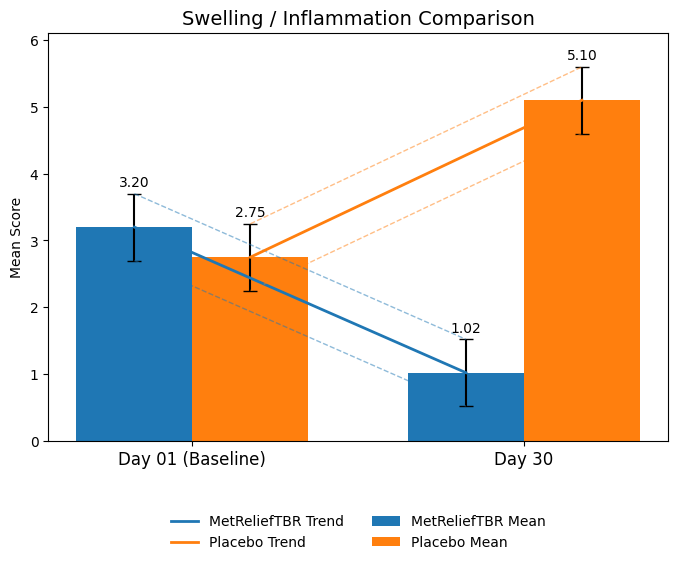

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
# X-axis categories
categories = ['Day 01 (Baseline)', 'Day 30']

# Values for the first cluster (MetReliefTBR)
metrelieftbr_values = [3.20, 1.02]
# Values for the second cluster (Placebo)
placebo_values = [2.75, 5.10]

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
placeholder_error = 0.5
metrelieftbr_error = [placeholder_error, placeholder_error]
placebo_error = [placeholder_error, placeholder_error]

# --- 3. Prepare for Plotting ---
x = np.arange(len(categories))
width = 0.35
metrelieftbr_color = '#1f77b4' # Blue
placebo_color = '#ff7f0e'      # Orange

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for MetReliefTBR
rects1 = ax.bar(x - width/2, metrelieftbr_values, width,
                label='MetReliefTBR Mean', color=metrelieftbr_color,
                yerr=metrelieftbr_error, capsize=5)

# Plot bars for Placebo
rects2 = ax.bar(x + width/2, placebo_values, width,
                label='Placebo Mean', color=placebo_color,
                yerr=placebo_error, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

# X-coordinates for MetReliefTBR and Placebo
x_metrelieftbr = x - width/2
x_placebo = x + width/2

# --- MetReliefTBR Trendline & Error Lines ---
y_metrelieftbr = metrelieftbr_values
e_metrelieftbr = metrelieftbr_error
color = metrelieftbr_color

# Plot the Mean Trend Line
ax.plot(x_metrelieftbr, y_metrelieftbr,
        linestyle='-', linewidth=2, color=color,
        label=f'MetReliefTBR Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_metrelieftbr[i] - e_metrelieftbr[i] for i in range(len(y_metrelieftbr))]
y_upper = [y_metrelieftbr[i] + e_metrelieftbr[i] for i in range(len(y_metrelieftbr))]
ax.plot(x_metrelieftbr, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_metrelieftbr, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- Placebo Trendline & Error Lines ---
y_placebo = placebo_values
e_placebo = placebo_error
color = placebo_color

# Plot the Mean Trend Line
ax.plot(x_placebo, y_placebo,
        linestyle='-', linewidth=2, color=color,
        label=f'Placebo Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_placebo[i] - e_placebo[i] for i in range(len(y_placebo))]
y_upper = [y_placebo[i] + e_placebo[i] for i in range(len(y_placebo))]
ax.plot(x_placebo, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_placebo, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- 6. Configure Plot Elements ---
ax.set_title('Swelling / Inflammation Comparison', fontsize=14)
ax.set_ylabel('Mean Score')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(max(metrelieftbr_values), max(placebo_values))
max_error = max(max(metrelieftbr_error), max(placebo_error))
ax.set_ylim(0, max_value * 1.1 + max_error)

# Add Data Labels (Mean)
def autolabel(rects, error_values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1, metrelieftbr_error)
autolabel(rects2, placebo_error)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI (FIXED) ---
file_name = 'swelling_inflammation_plot.svg'
plt.savefig(file_name, format='svg', dpi=600, bbox_inches='tight')
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: pain_muscle_injury_plot.svg


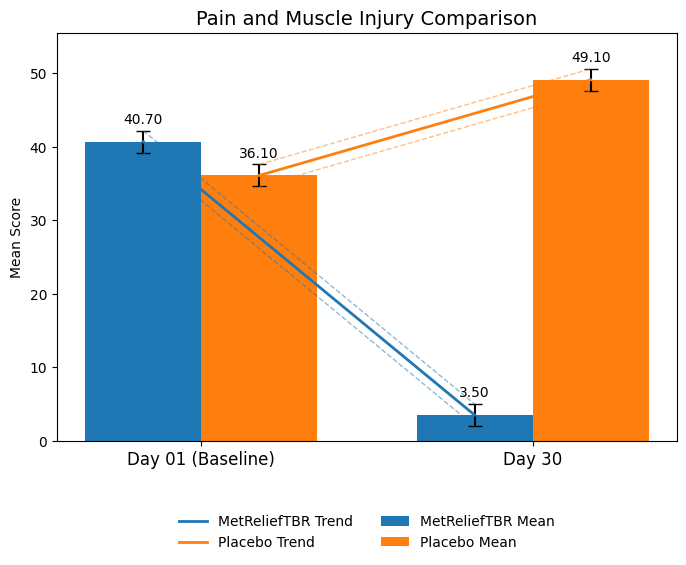

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
# X-axis categories
categories = ['Day 01 (Baseline)', 'Day 30']

# Values for the first cluster (MetReliefTBR)
metrelieftbr_values = [40.70, 3.50]
# Values for the second cluster (Placebo)
placebo_values = [36.10, 49.10]

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
placeholder_error = 1.5
metrelieftbr_error = [placeholder_error, placeholder_error]
placebo_error = [placeholder_error, placeholder_error]

# --- 3. Prepare for Plotting ---
x = np.arange(len(categories))
width = 0.35
metrelieftbr_color = '#1f77b4' # Blue
placebo_color = '#ff7f0e'      # Orange

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for MetReliefTBR
rects1 = ax.bar(x - width/2, metrelieftbr_values, width,
                label='MetReliefTBR Mean', color=metrelieftbr_color,
                yerr=metrelieftbr_error, capsize=5)

# Plot bars for Placebo
rects2 = ax.bar(x + width/2, placebo_values, width,
                label='Placebo Mean', color=placebo_color,
                yerr=placebo_error, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

# X-coordinates for MetReliefTBR and Placebo
x_metrelieftbr = x - width/2
x_placebo = x + width/2

# --- MetReliefTBR Trendline & Error Lines ---
y_metrelieftbr = metrelieftbr_values
e_metrelieftbr = metrelieftbr_error
color = metrelieftbr_color

# Plot the Mean Trend Line
ax.plot(x_metrelieftbr, y_metrelieftbr,
        linestyle='-', linewidth=2, color=color,
        label=f'MetReliefTBR Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_metrelieftbr[i] - e_metrelieftbr[i] for i in range(len(y_metrelieftbr))]
y_upper = [y_metrelieftbr[i] + e_metrelieftbr[i] for i in range(len(y_metrelieftbr))]
ax.plot(x_metrelieftbr, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_metrelieftbr, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- Placebo Trendline & Error Lines ---
y_placebo = placebo_values
e_placebo = placebo_error
color = placebo_color

# Plot the Mean Trend Line
ax.plot(x_placebo, y_placebo,
        linestyle='-', linewidth=2, color=color,
        label=f'Placebo Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_placebo[i] - e_placebo[i] for i in range(len(y_placebo))]
y_upper = [y_placebo[i] + e_placebo[i] for i in range(len(y_placebo))]
ax.plot(x_placebo, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_placebo, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- 6. Configure Plot Elements ---
ax.set_title('Pain and Muscle Injury Comparison', fontsize=14)
ax.set_ylabel('Mean Score')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(max(metrelieftbr_values), max(placebo_values))
max_error = max(max(metrelieftbr_error), max(placebo_error))
ax.set_ylim(0, max_value * 1.1 + max_error)

# Add Data Labels (Mean)
def autolabel(rects, error_values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1, metrelieftbr_error)
autolabel(rects2, placebo_error)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI (FIXED) ---
file_name = 'pain_muscle_injury_plot.svg'
plt.savefig(file_name, format='svg', dpi=600, bbox_inches='tight')
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")

Plot generation code complete. Run this in Colab/Jupyter to generate: ibs_assessment_plot.svg


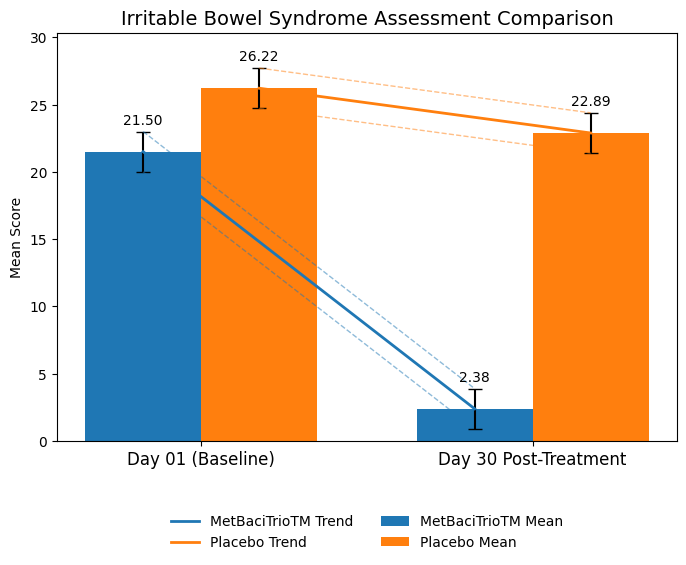

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Define the NEW Data (Mean) ---
# X-axis categories
categories = ['Day 01 (Baseline)', 'Day 30 Post-Treatment']

# Values for the first cluster (MetBaciTrioTM)
metbacitrio_values = [21.50, 2.38]
# Values for the second cluster (Placebo)
placebo_values = [26.22, 22.89]

# --- 2. Define Placeholder Error Data (!!! REPLACE THIS WITH YOUR REAL SD/SEM !!!) ---
placeholder_error = 1.5
metbacitrio_error = [placeholder_error, placeholder_error]
placebo_error = [placeholder_error, placeholder_error]

# --- 3. Prepare for Plotting ---
x = np.arange(len(categories))
width = 0.35
metbacitrio_color = '#1f77b4' # Blue
placebo_color = '#ff7f0e'      # Orange

# --- 4. Create the Plot (Bar Plot with Error Bars) ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for MetBaciTrioTM
rects1 = ax.bar(x - width/2, metbacitrio_values, width,
                label='MetBaciTrioTM Mean', color=metbacitrio_color,
                yerr=metbacitrio_error, capsize=5)

# Plot bars for Placebo
rects2 = ax.bar(x + width/2, placebo_values, width,
                label='Placebo Mean', color=placebo_color,
                yerr=placebo_error, capsize=5)

# --- 5. Add Connecting Lines (Trendline and Error Lines) ---

# X-coordinates for MetBaciTrioTM and Placebo
x_metbacitrio = x - width/2
x_placebo = x + width/2

# --- MetBaciTrioTM Trendline & Error Lines ---
y_metbacitrio = metbacitrio_values
e_metbacitrio = metbacitrio_error
color = metbacitrio_color

# Plot the Mean Trend Line
ax.plot(x_metbacitrio, y_metbacitrio,
        linestyle='-', linewidth=2, color=color,
        label=f'MetBaciTrioTM Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_metbacitrio[i] - e_metbacitrio[i] for i in range(len(y_metbacitrio))]
y_upper = [y_metbacitrio[i] + e_metbacitrio[i] for i in range(len(y_metbacitrio))]
ax.plot(x_metbacitrio, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_metbacitrio, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- Placebo Trendline & Error Lines ---
y_placebo = placebo_values
e_placebo = placebo_error
color = placebo_color

# Plot the Mean Trend Line
ax.plot(x_placebo, y_placebo,
        linestyle='-', linewidth=2, color=color,
        label=f'Placebo Trend')

# Plot the Error Lines (connecting the error caps)
y_lower = [y_placebo[i] - e_placebo[i] for i in range(len(y_placebo))]
y_upper = [y_placebo[i] + e_placebo[i] for i in range(len(y_placebo))]
ax.plot(x_placebo, y_lower, linestyle='--', linewidth=1, color=color, alpha=0.5)
ax.plot(x_placebo, y_upper, linestyle='--', linewidth=1, color=color, alpha=0.5)


# --- 6. Configure Plot Elements ---
ax.set_title('Irritable Bowel Syndrome Assessment Comparison', fontsize=14)
ax.set_ylabel('Mean Score')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)

# Adjust legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(l)] for l in unique_labels]
ax.legend(unique_handles, unique_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

# Set Y-axis limits
max_value = max(max(metbacitrio_values), max(placebo_values))
max_error = max(max(metbacitrio_error), max(placebo_error))
ax.set_ylim(0, max_value * 1.1 + max_error)

# Add Data Labels (Mean)
def autolabel(rects, error_values):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height + error_values[i]),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(rects1, metbacitrio_error)
autolabel(rects2, placebo_error)

plt.subplots_adjust(bottom=0.20)

# --- 7. Save in SVG Format at 600 DPI (FIXED) ---
file_name = 'ibs_assessment_plot.svg'
plt.savefig(file_name, format='svg', dpi=600, bbox_inches='tight')
print(f"Plot generation code complete. Run this in Colab/Jupyter to generate: {file_name}")